# Big Data and Minining Report Codes
## Name: Olawale Omotosho
## Student Number: 202308338

In [1]:
#import necessary libraries
import sqlite3
import pandas as pd
import numpy as np

## Establish connection

In [2]:
con = sqlite3.connect('accident_database.db')
cur = con.cursor()

### Get the tables

In [3]:
tables = []
cur.execute("SELECT name from sqlite_master WHERE type='table'")
for i in cur.fetchall():
    tables.append(str(i[0]))
    
tables

['accident', 'casualty', 'vehicle', 'lsoa']

### Extract the columns from the tables

### accident columns

In [4]:
accident_columns = []
cur.execute("PRAGMA table_info(accident)")
for i in cur.fetchall():
    accident_columns.append(i[1])
    
accident_columns

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

### Casualty columns

In [5]:
casualty_columns =[]
cur.execute("PRAGMA table_info(casualty)")
for i in cur.fetchall():
    casualty_columns.append(i[1])
    
casualty_columns

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

### Vehicle Columns

In [6]:
vehicle_columns =[]
cur.execute("PRAGMA table_info(vehicle)")
for i in cur.fetchall():
    vehicle_columns.append(i[1])
    
vehicle_columns

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

### lsoa Columns

In [7]:
lsoa_columns = []
cur.execute("PRAGMA table_info(lsoa)")
for i in cur.fetchall():
    lsoa_columns.append(i[1])
    
lsoa_columns

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

# EXTRACTING INFO FOR THE YEAR 2020 ONLY TO ANSWER THE QUESTIONS

In [8]:
# Query to extract accident data for the year 2020
query = """
SELECT *
FROM accident
WHERE accident_year = 2020;
"""

# Load the data into a Pandas DataFrame
df_accident = pd.read_sql_query(query, con)

In [9]:
# Query to extract vehicle data for the year 2020
query = """
SELECT *
FROM vehicle
WHERE accident_year = 2020;
"""

# Load the data into a Pandas DataFrame
df_vehicle = pd.read_sql_query(query, con)

In [10]:
# Query to extract casualty data for the year 2020
query = """
SELECT *
FROM casualty
WHERE accident_year = 2020;
"""

# Load the data into a Pandas DataFrame
df_casualty = pd.read_sql_query(query, con)

In [11]:
# Query to extract lsoa data 
query = """
SELECT *
FROM lsoa;
"""

# Load the data into a Pandas DataFrame
df_lsoa = pd.read_sql_query(query, con)

## INSPECTING THE TABLES

In [12]:
df_lsoa

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0             1  E01000001  City of London 001A  City of London 001A   
1             2  E01000002  City of London 001B  City of London 001B   
2             3  E01000003  City of London 001C  City of London 001C   
3             4  E01000004  City of London 001D  City of London 001D   
4             5  E01000005  City of London 001E  City of London 001E   
...         ...        ...                  ...                  ...   
34373     34374  W01001892         Cardiff 020D        Caerdydd 020D   
34374     34375  W01001893         Cardiff 010B        Caerdydd 010B   
34375     34376  W01001894         Cardiff 010C        Caerdydd 010C   
34376     34377  W01001895         Cardiff 010D        Caerdydd 010D   
34377     34378  W01001896         Cardiff 020E        Caerdydd 020E   

        shape__area  shape__length                              globalid  
0      1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1      2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2      5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3      2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4      1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
...             ...            ...                                   ...  
34373  2.699088e+05    2537.220060  1a25aa1e-5db5-4d32-8355-473409dbd69f  
34374  4.288488e+06    9807.284401  b6af5e24-eb2a-404a-98a6-a282037b3e10  
34375  3.337511e+05    2929.546177  72d16f53-115d-4926-936d-2f1b1d659d46  
34376  1.360174e+06    8141.281226  8e105eb9-f68e-4cdb-bca6-b49f6592cb71  
34377  3.124395e+05    3823.366435  c885f171-a56e-4e2b-8d09-1c7d6efedd67  

[34378 rows x 7 columns]

In [13]:
df_accident

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [14]:
df_accident.dtypes

accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road

In [15]:
df_accident.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [16]:
df_vehicle

vehicle_index accident_index  accident_year accident_reference  \
0              681716  2020010219808           2020          010219808   
1              681717  2020010220496           2020          010220496   
2              681718  2020010228005           2020          010228005   
3              681719  2020010228006           2020          010228006   
4              681720  2020010228011           2020          010228011   
...               ...            ...            ...                ...   
167370         849086  2020991030297           2020          991030297   
167371         849087  2020991030297           2020          991030297   
167372         849088  2020991030900           2020          991030900   
167373         849089  2020991030900           2020          991030900   
167374         849090  2020991032575           2020          991032575   

        vehicle_reference  vehicle_type  towing_and_articulation  \
0                       1             9                        9   
1                       1             9                        0   
2                       1             9                        0   
3                       1             8                        0   
4                       1             9                        0   
...                   ...           ...                      ...   
167370                  1             9                        0   
167371                  2             5                        0   
167372                  1             9                        0   
167373                  2             1                        0   
167374                  1             9                        0   

        vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                       5                       1                     5  ...   
1                       4                       2                     6  ...   
2                      18                      -1                    -1  ...   
3                      18                       1                     5  ...   
4                      18                       3                     7  ...   
...                   ...                     ...                   ...  ...   
167370                  7                       8                     2  ...   
167371                 16                       6                     2  ...   
167372                  7                       8                     2  ...   
167373                 18                       6                     2  ...   
167374                  1                       8                     4  ...   

        journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                               6              2             32   
1                               2              1             45   
2                               6              3             -1   
3                               1              1             44   
4                               6              1             20   
...                           ...            ...            ...   
167370                          1              1             57   
167371                          5              1             38   
167372                          6              2             68   
167373                          6              1             76   
167374                          6              1             39   

        age_band_of_driver  engine_capacity_cc  propulsion_code  \
0                        6                1968                2   
1                        7                1395                1   
2                       -1                  -1               -1   
3                        7                1798                8   
4                        4                2993                2   
...                    ...                 ...              ...   
167370                   9                1968                2   


In [17]:
df_vehicle.dtypes

vehicle_index                        int64
accident_index                      object
accident_year                        int64
accident_reference                  object
vehicle_reference                    int64
vehicle_type                         int64
towing_and_articulation              int64
vehicle_manoeuvre                    int64
vehicle_direction_from               int64
vehicle_direction_to                 int64
vehicle_location_restricted_lane     int64
junction_location                    int64
skidding_and_overturning             int64
hit_object_in_carriageway            int64
vehicle_leaving_carriageway          int64
hit_object_off_carriageway           int64
first_point_of_impact                int64
vehicle_left_hand_drive              int64
journey_purpose_of_driver            int64
sex_of_driver                        int64
age_of_driver                        int64
age_band_of_driver                   int64
engine_capacity_cc                   int64
propulsion_

In [18]:
df_casualty

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [19]:
df_casualty.dtypes

casualty_index                         int64
accident_index                        object
accident_year                          int64
accident_reference                    object
vehicle_reference                      int64
casualty_reference                     int64
casualty_class                         int64
sex_of_casualty                        int64
age_of_casualty                        int64
age_band_of_casualty                   int64
casualty_severity                      int64
pedestrian_location                    int64
pedestrian_movement                    int64
car_passenger                          int64
bus_or_coach_passenger                 int64
pedestrian_road_maintenance_worker     int64
casualty_type                          int64
casualty_home_area_type                int64
casualty_imd_decile                    int64
dtype: object

## 1. Are there significant hours of the day, and days of the week, on which accidents occur?



## Inspecting the date and time columns

In [20]:
df_accident["day_of_week"].unique()

array([3, 2, 4, 5, 6, 7, 1], dtype=int64)

In [21]:
df_accident["time"].unique()

array(['09:00', '13:55', '01:25', ..., '04:51', '05:11', '04:42'],
      dtype=object)

### I will visualize the frequuencies of accidents using a countplot and changing the time to hours(dt.hour)

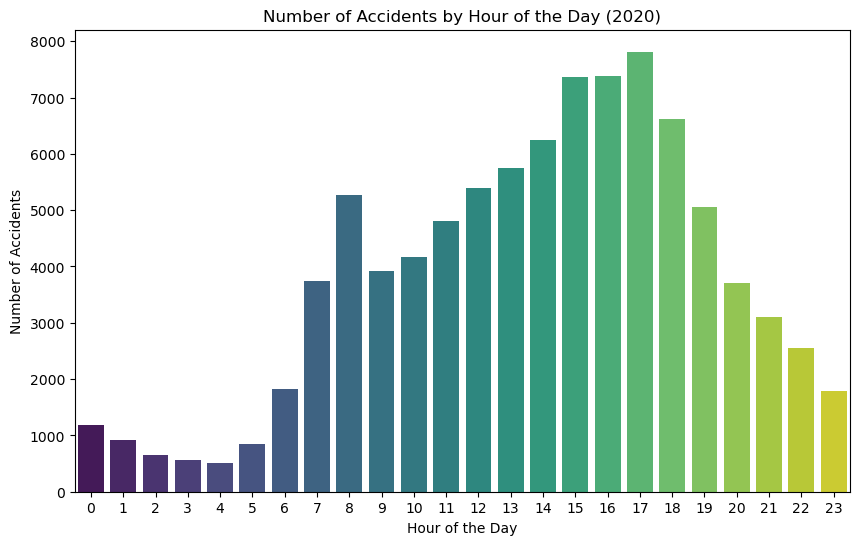

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Extract the hour of the day from the 'time' column
df_accident['hour'] = pd.to_datetime(df_accident['time']).dt.hour

# Plot the number of accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accident, x='hour', palette='viridis')
plt.title('Number of Accidents by Hour of the Day (2020)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

# Save the plot to the 'charts' folder I have created 
plt.savefig('charts/accidents_by_hour.png')

plt.show()

In [23]:
# Count the number of accidents by hour
hourly_accident_counts = df_accident['time'].value_counts().sort_index()
hourly_accident_counts

00:00    36
00:01    91
00:02    16
00:03    15
00:04    23
         ..
23:55    40
23:56    14
23:57    16
23:58     9
23:59    14
Name: time, Length: 1438, dtype: int64

#### I will define a fuction to change the name of week to the actual name of the day and visualize a chart to show the days with the highest accident frequencies

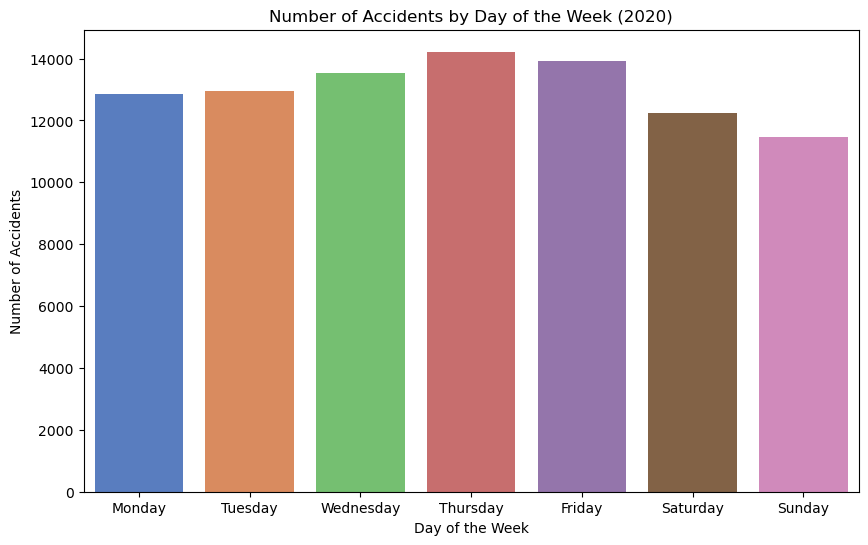

In [24]:
df_accident['day_of_week'] = pd.to_datetime(df_accident['date']).dt.dayofweek

def get_day_name(day_of_week):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days[day_of_week]

# Applying the function to the 'day_of_week' column to get the day names
df_accident['day_name'] = df_accident['day_of_week'].apply(get_day_name)


# Plot the number of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accident, x='day_name', palette='muted', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Accidents by Day of the Week (2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.savefig('charts/accidents_by_day.png')

plt.show()

## 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc??

#### I will design a function that generates countplots for the 4 different categories of motorbikes. These countplots will illustrate the distribution of accidents across various hours of the day.

#### same approach will be used to visualize the distribution for days of the week



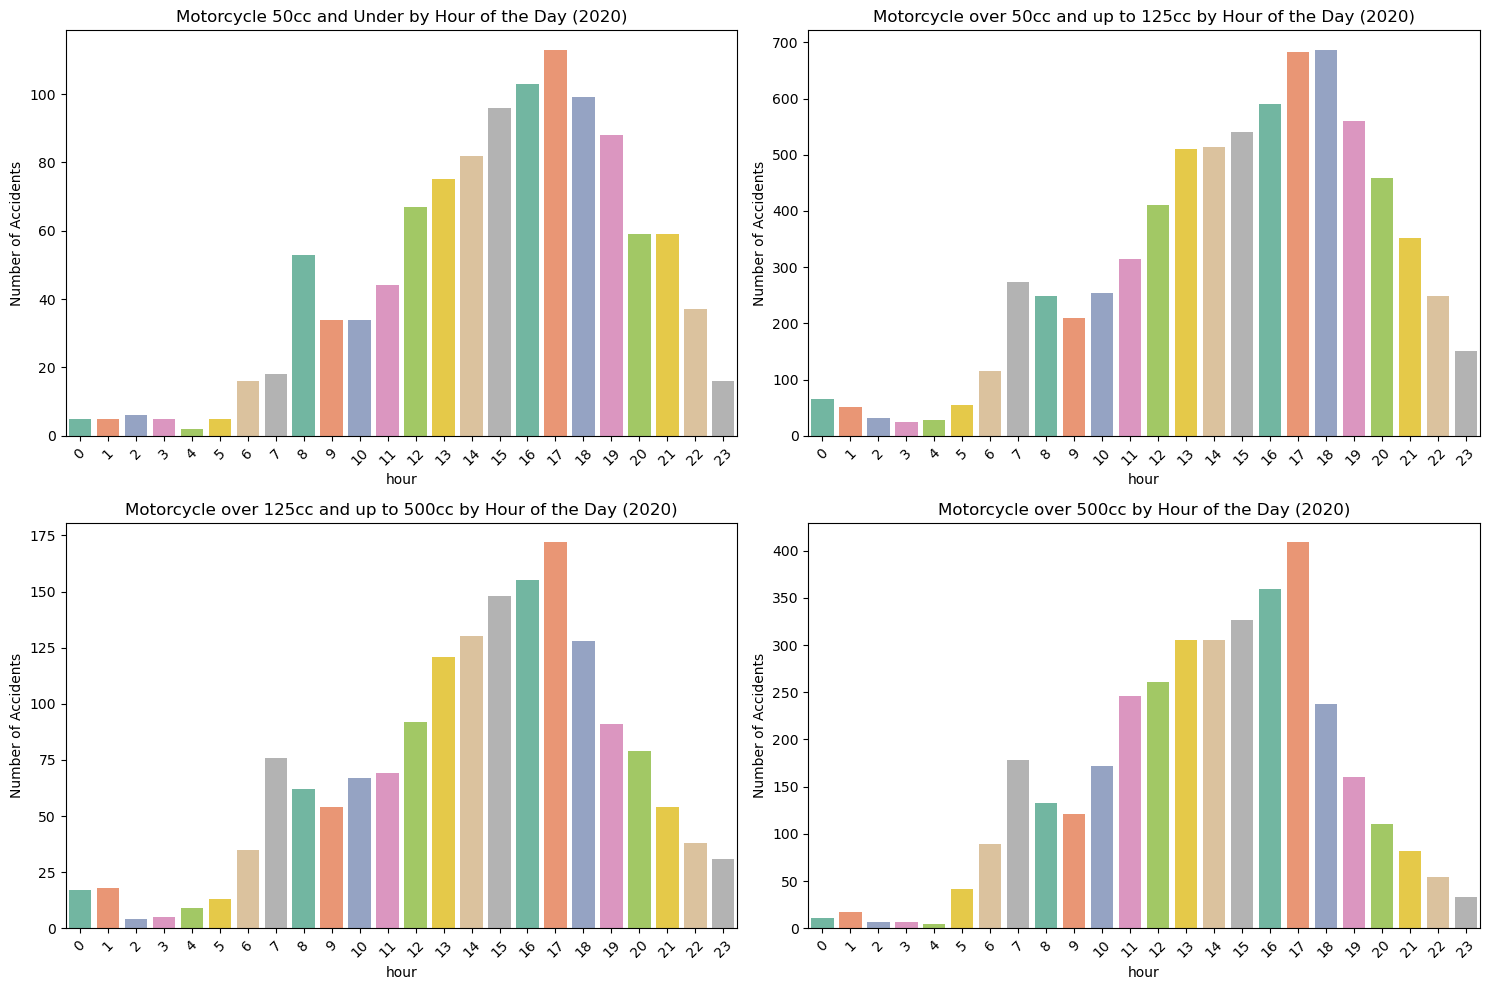

In [25]:
# Create a function to plot the countplot
def plot_countplot(data, title, ax):
    sns.countplot(data=data, x='hour', palette='Set2', ax=ax)  # Using 'Set2' color palette
    ax.set_title(title)
    ax.set_ylabel('Number of Accidents')
    ax.tick_params(axis='x', rotation=45)

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Filter the data for accidents involving Motorcycle 50cc and under
df_motorbike_50cc_under = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 2]['accident_index'])]
if not df_motorbike_50cc_under.empty:
    plot_countplot(df_motorbike_50cc_under, 'Motorcycle 50cc and Under by Hour of the Day (2020)', axs[0, 0])
    plt.savefig('charts/motorbike_50cc_under.png') #Saving out the plot
    
    
# Filter the data for accidents involving Motorcycle over 50cc and up to 125cc
df_motorbike_over_50cc_up_to_125cc = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 3]['accident_index'])]
if not df_motorbike_over_50cc_up_to_125cc.empty:
    plot_countplot(df_motorbike_over_50cc_up_to_125cc, 'Motorcycle over 50cc and up to 125cc by Hour of the Day (2020)', axs[0, 1])
    plt.savefig('charts/motorbike_over_50cc_up_to_125cc.png')
    
    
# Filter the data for accidents involving Motorcycle over 125cc and up to 500cc
df_motorbike_over_125cc_up_to_500cc = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 4]['accident_index'])]
if not df_motorbike_over_125cc_up_to_500cc.empty:
    plot_countplot(df_motorbike_over_125cc_up_to_500cc, 'Motorcycle over 125cc and up to 500cc by Hour of the Day (2020)', axs[1, 0])
    plt.savefig('charts/motorbike_over_125cc_up_to_500cc.png')
    
    
# Filter the data for accidents involving Motorcycle over 500cc
df_motorbike_over_500cc = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 5]['accident_index'])]
if not df_motorbike_over_500cc.empty:
    plot_countplot(df_motorbike_over_500cc, 'Motorcycle over 500cc by Hour of the Day (2020)', axs[1, 1])
    plt.savefig('charts/motorbike_over_500cc.png')
    
# Adjust and show the plots
plt.tight_layout()
plt.show()


#### 3b. days of the week

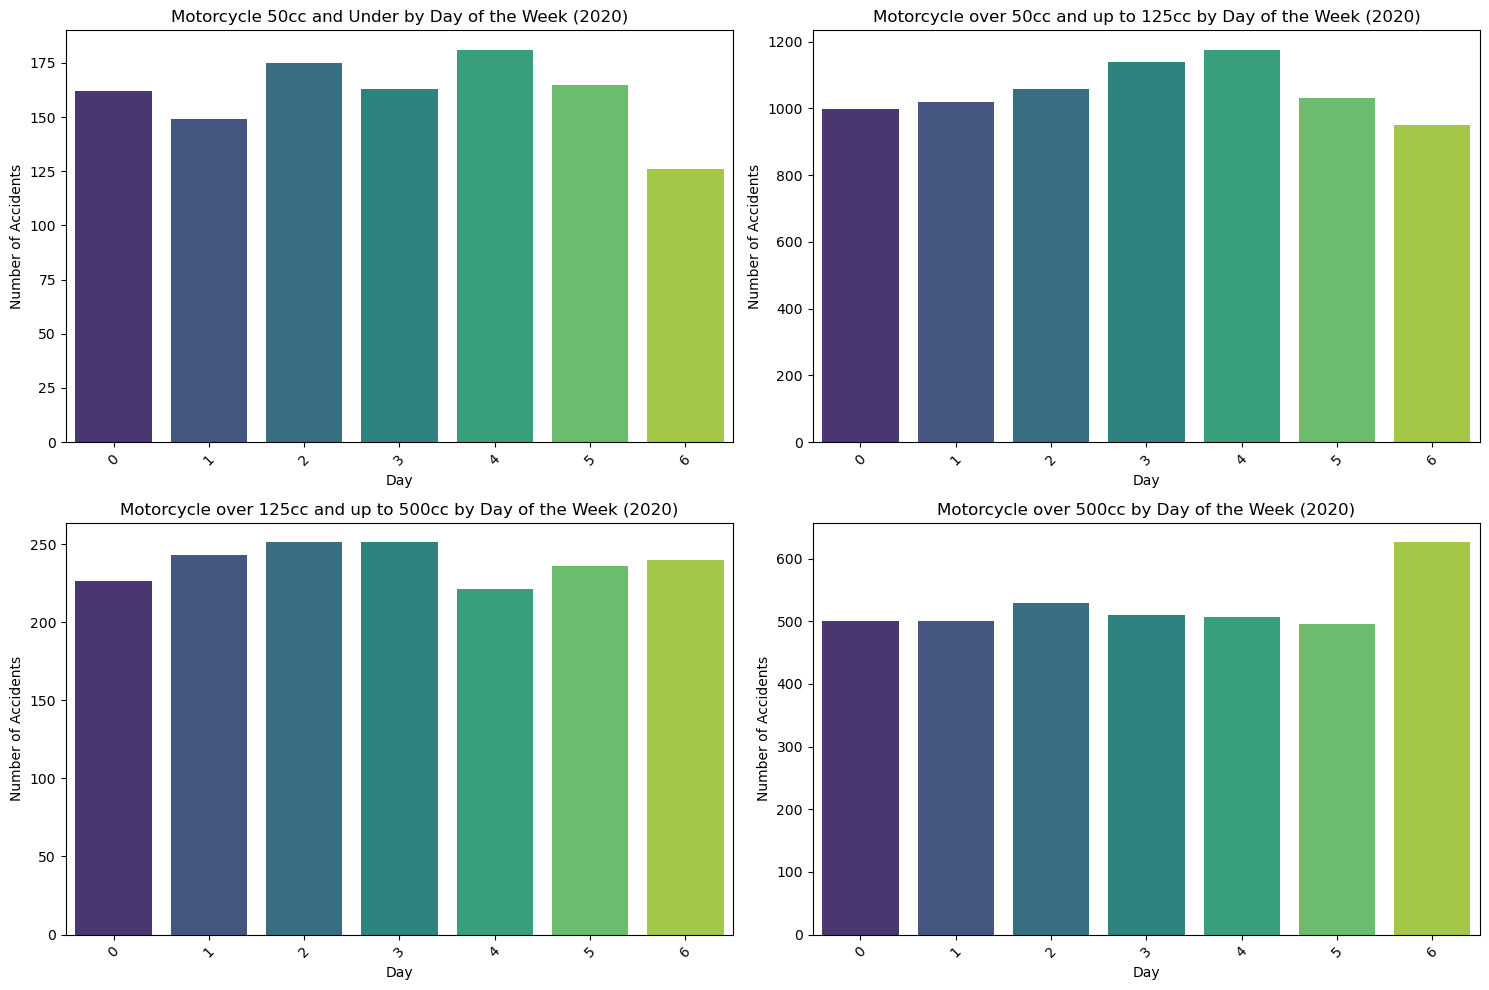

In [26]:
df_vehicle['vehicle_type'] = df_vehicle['vehicle_type'].astype(int)

# Define a function to plot accidents by day of the week for each motorcycle class
def plot_motorbike_accidents_by_day(df_motorbike, title, ax):
    sns.countplot(data=df_motorbike, x='day_of_week', palette='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Accidents')
    ax.tick_params(axis='x', rotation=45)

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Filter the data for each motorcycle class and plot accidents by day of the week
df_motorbike_50cc_under = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 2]['accident_index'])]
if not df_motorbike_50cc_under.empty:
    plot_motorbike_accidents_by_day(df_motorbike_50cc_under, 'Motorcycle 50cc and Under by Day of the Week (2020)', axs[0, 0])
    plt.savefig('charts/motorbike_50cc_under_dow.png') #Saving out the plot
    
    
df_motorbike_over_50cc_up_to_125cc = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 3]['accident_index'])]
if not df_motorbike_over_50cc_up_to_125cc.empty:
    plot_motorbike_accidents_by_day(df_motorbike_over_50cc_up_to_125cc, 'Motorcycle over 50cc and up to 125cc by Day of the Week (2020)', axs[0, 1])
    plt.savefig('charts/motorbike_over_50cc_up_to_125cc_dow.png')
    
    
df_motorbike_over_125cc_up_to_500cc = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 4]['accident_index'])]
if not df_motorbike_over_125cc_up_to_500cc.empty:
    plot_motorbike_accidents_by_day(df_motorbike_over_125cc_up_to_500cc, 'Motorcycle over 125cc and up to 500cc by Day of the Week (2020)', axs[1, 0])
    plt.savefig('charts/motorbike_over_125cc_up_to_500cc_dow.png')
    
    
df_motorbike_over_500cc = df_accident[df_accident['accident_index'].isin(df_vehicle[df_vehicle['vehicle_type'] == 5]['accident_index'])]
if not df_motorbike_over_500cc.empty:
    plot_motorbike_accidents_by_day(df_motorbike_over_500cc, 'Motorcycle over 500cc by Day of the Week (2020)', axs[1, 1])
    plt.savefig('charts/motorbike_over_500cc_dow.png')
    
# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


## 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

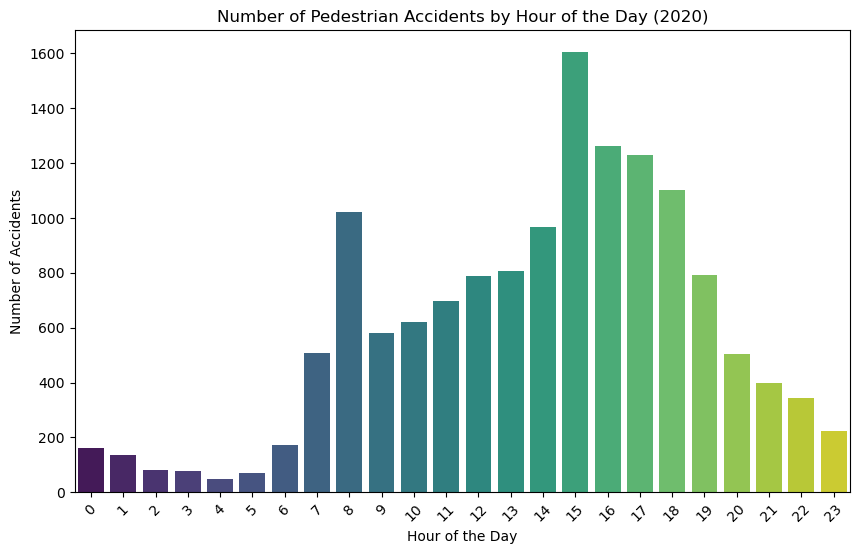

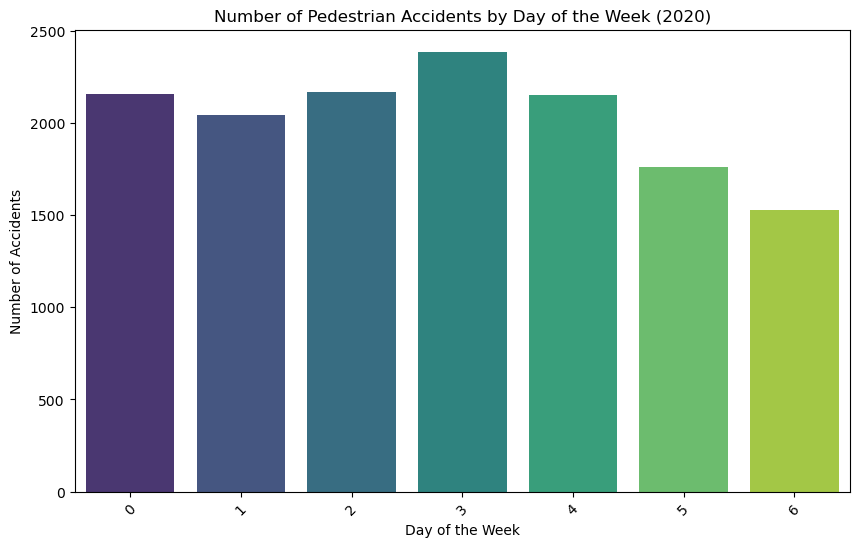

In [27]:
# Filter for pedestrian-related accidents (casualty_class = 3)
df_pedestrians = df_accident[df_accident['accident_index'].isin(df_casualty[df_casualty['casualty_class'] == 3]['accident_index'])]

# Check if the DataFrame is empty
if df_pedestrians.empty:
    print("No pedestrian accidents.")
else:
    # Plot the number of pedestrian accidents by hour of the day
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_pedestrians, x='hour', palette='viridis')
    plt.title('Number of Pedestrian Accidents by Hour of the Day (2020)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    
    plt.savefig('charts/pedestrian_accidents_by_hour.png')
    
    plt.show()

    # Plot the number of pedestrian accidents by day of the week
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_pedestrians, x='day_of_week', palette='viridis')
    plt.title('Number of Pedestrian Accidents by Day of the Week (2020)')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    
    plt.savefig('charts/pedestrian_accidents_by_dow.png')
    
    plt.show()


## 4. Using the apriori algorithm, explore the impact of selected variables on accident severity. 

### First I am going to feature selection to explore the data and select the relevant features impacting accident severity

### Seeing I am dealing with an inbalanced data and face undersampling. I will balance the data using RandomUnderSampler from imblearn library to balance the severity values. I will do this befpre chosing the features. 

### When this is done, I will run the apriori algorithm

In [28]:
# Check the unique values
df_accident.accident_severity.unique()

array([3, 2, 1], dtype=int64)

### Creating a label for severe accidents (accident_severity = 1)

In [29]:
y_label = df_accident['accident_severity'] == 1


In [30]:
# Counting the number of labels in y_label
y_label.value_counts()

False    89808
True      1391
Name: accident_severity, dtype: int64

### Balance the dataset

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
accident_drop=df_accident
# Balancing the dataset using RandomUnderSampler
acc_balanced, y_bal = RandomUnderSampler().fit_resample(accident_drop, y_label)

In [33]:
# Dropping the 'accident_severity' column from the balanced dataset
acc_balanced = acc_balanced.drop(['accident_severity'], axis = 1)

In [34]:
# Selecting only numeric features in the balanced dataset
acc_balanced = acc_balanced.select_dtypes([np.number])

In [35]:
acc_balanced

accident_year  location_easting_osgr  location_northing_osgr  longitude  \
0              2020               370372.0                263553.0  -2.435594   
1              2020               562263.0                172564.0   0.332737   
2              2020               513138.0                183797.0  -0.369948   
3              2020               512319.0                430921.0  -0.297645   
4              2020               398885.0                298514.0  -2.017884   
...             ...                    ...                     ...        ...   
2777           2020               254367.0                661245.0  -4.326142   
2778           2020               270790.0                659812.0  -4.063523   
2779           2020               113410.0                903322.0  -6.842655   
2780           2020               381609.0                654146.0  -2.294786   
2781           2020               381719.0                665575.0  -2.293805   

       latitude  police_force  number_of_vehicles  number_of_casualties  \
0     52.269341            22                   1                     1   
1     51.428851            46                   2                     1   
2     51.541742             1                   2                     1   
3     53.762563            16                   2                     1   
4     52.584448            20                   3                     1   
...         ...           ...                 ...                   ...   
2777  55.822415            99                   1                     1   
2778  55.814225            99                   2                     1   
2779  57.926736            99                   1                     1   
2780  55.780278            99                   2                     1   
2781  55.882969            99                   2                     1   

      day_of_week  local_authority_district  ...  \
0               0                       285  ...   
1               0                       535  ...   
2               1                        27  ...   
3               5                       228  ...   
4               0                       307  ...   
...           ...                       ...  ...   
2777            0                       926  ...   
2778            0                       938  ...   
2779            3                       941  ...   
2780            4                       914  ...   
2781            0                       914  ...   

      pedestrian_crossing_physical_facilities  light_conditions  \
0                                           0                 1   
1                                           0                 1   
2                                           0                 1   
3                                           0                 1   
4                                           0                 1   
...                                       ...               ...   
2777                                        0                 4   
2778                                        0                 6   
2779                                        0                 1   
2780                                        0                 1   
2781                                        0                 1   

      weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                      1                        1                           0   
1                      1                        1                           0   
2                      1                        1                           0   
3                      1                        1                           0   
4                      1                        1                           0   
...                  ...                      ...                         ...   
2777                   1                        2                           0   
2778                   1                        2     

In [36]:
acc_balanced.isna().sum()

accident_year                                  0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions    

In [37]:
# Drop the rows with nan values
acc_balanced = acc_balanced.dropna()


In [38]:
acc_balanced.isna().sum()

accident_year                                  0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions    

### Select Best Features

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

In [40]:
# Initialize feature selector and select the top 10 features
selector = SelectKBest(f_classif, k = 10)

In [41]:
# Fit the feature selector on the balanced data and target
selector.fit(acc_balanced, y_bal)

SelectKBest()

In [42]:
# Boolean mask
bool_mask = selector.get_support()

In [43]:
# Get the names of features
names = selector.feature_names_in_[bool_mask]

In [44]:
# Get the scores of features
scores = selector.scores_[bool_mask]

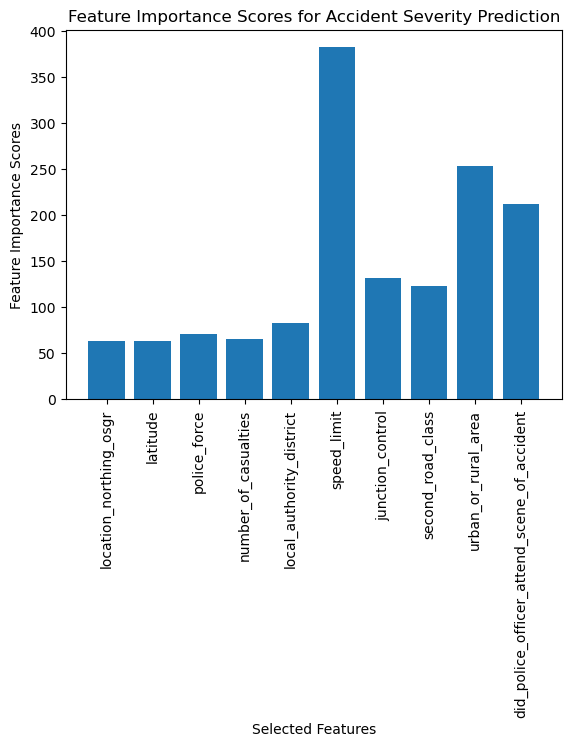

In [45]:
# Visualize the scores of selected features
plt.bar(names, scores)
plt.xticks(rotation='vertical')
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance Scores')
plt.title('Feature Importance Scores for Accident Severity Prediction')
plt.savefig('charts/featureselection.png')
plt.show()


### I have the relevant features I need now. 
### For my Apriori Algorithm, I will select the 5 most relevant features ( speed_limit, urban_or_rural_area, did_police_officer_attend_the_scene_of_accident, junction_control, second_road_class)
### I intend to explore these columns and clean them 

### Speed_limit

In [46]:

rows_with_minus_one_speed = df_accident[df_accident['speed_limit'] == -1]
rows_with_minus_one_speed

accident_index  accident_year accident_reference  location_easting_osgr  \
1993   2020010234355           2020          010234355               548270.0   
5381   2020010244932           2020          010244932               527033.0   
16520  2020010275266           2020          010275266               548903.0   
18039  2020010279612           2020          010279612               540131.0   
18264  2020010280179           2020          010280179               529031.0   
18487  2020010280770           2020          010280770               537440.0   
20496  2020010286380           2020          010286380               519882.0   
31115  2020101009449           2020          101009449               434889.0   
47041  2020231004014           2020          231004014               431195.0   
53894  2020350934310           2020          350934310               546182.0   
55920  2020360993413           2020          360993413               551861.0   
68361  2020450928947           2020          450928947               516145.0   

       location_northing_osgr  longitude   latitude  police_force  \
1993                 183677.0   0.136269  51.532537             1   
5381                 179914.0  -0.171085  51.503893             1   
16520                183497.0   0.145312  51.530753             1   
18039                169512.0   0.013394  51.407327             1   
18264                163756.0  -0.148194  51.358229             1   
18487                185948.0  -0.018879  51.555683             1   
20496                179251.0  -0.274291  51.499495             1   
31115                570038.0  -1.455831  55.023670            10   
47041                286045.0  -1.542189  52.471470            23   
53894                257330.0   0.137331  52.194846            35   
55920                292434.0   0.236208  52.508668            36   
68361                159489.0  -0.334569  51.322656            45   

       accident_severity  number_of_vehicles  ...  weather_conditions  \
1993                   3                   1  ...                   1   
5381                   3                   1  ...                   1   
16520                  2                   1  ...                   2   
18039                  3                   1  ...                   2   
18264                  3                   1  ...                   9   
18487                  3                   2  ...                   7   
20496                  2                   1  ...                   1   
31115                  2                   1  ...                   2   
47041                  3                   1  ...                   1   
53894                  3                   1  ...                   1   
55920                  3                   1  ...                   1   
68361                  3                   2  ...                   1   

      road_surface_conditions  special_conditions_at_site carriageway_hazards  \
1993                        1                           0                   0   
5381                        1                           0                   0   
16520                       1                           0                   0   
18039                       2                           0                   0   
18264                       9                           9                   9   
18487                       1                           0                   0   
20496                       1                           0                   0   
31115                       1                           0                   0   
47041                       2                           0                   0   
53894                       1                           0                   0   
55920                       1                           0                   0   
68361                       1                           0                   0   

       urban_or_rural_area did_police_officer_atte

In [47]:
mode_speed_limit = df_accident['speed_limit'].mode()[0]
df_accident['speed_limit'] = df_accident['speed_limit'].replace(-1, mode_speed_limit)


minus_one_speed = df_accident[df_accident['speed_limit'] == -1]
minus_one_speed


Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location, hour, day_name]
Index: []

[0 rows x 38 columns]

### did_police_officer_attend_scene

In [48]:
[df_accident['did_police_officer_attend_scene_of_accident'].unique()]

[array([ 3,  1,  2, -1], dtype=int64)]

In [49]:
# check for -1 did_police_officer_attend
minus_one_police_officer = df_accident[df_accident['did_police_officer_attend_scene_of_accident'] == -1]
minus_one_police_officer

accident_index  accident_year accident_reference  location_easting_osgr  \
79777  2020520002488           2020          520002488               343681.0   

       location_northing_osgr  longitude   latitude  police_force  \
79777                154706.0  -2.809007  51.288686            52   

       accident_severity  number_of_vehicles  ...  weather_conditions  \
79777                  1                   1  ...                  -1   

      road_surface_conditions  special_conditions_at_site carriageway_hazards  \
79777                      -1                          -1                  -1   

       urban_or_rural_area did_police_officer_attend_scene_of_accident  \
79777                    2                                          -1   

      trunk_road_flag  lsoa_of_accident_location  hour   day_name  
79777               2                  E01029085     1  Wednesday  

[1 rows x 38 columns]

In [50]:
# Check mode
[df_accident['did_police_officer_attend_scene_of_accident'].mode()[0]]

# Replace -1 with 1 (mode)
df_accident['did_police_officer_attend_scene_of_accident'] = df_accident['did_police_officer_attend_scene_of_accident'].replace(-1, mode_speed_limit)

minus_one_police_officer = df_accident[df_accident['did_police_officer_attend_scene_of_accident'] == -1]
minus_one_police_officer

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location, hour, day_name]
Index: []

[0 rows x 38 columns]

### junction_control

In [51]:

[df_accident['junction_control'].unique()]

[array([-1,  2,  1,  4,  9,  3], dtype=int64)]

In [52]:
minus_one_junction = df_accident[(df_accident['junction_control'] == -1) | (df_accident['junction_control'] == 9)]
minus_one_junction



accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
3      2020010228006           2020          010228006               538676.0   
12     2020010228031           2020          010228031               553943.0   
13     2020010228032           2020          010228032               526375.0   
15     2020010228038           2020          010228038               553007.0   
...              ...            ...                ...                    ...   
91186  2020991020957           2020          991020957               253049.0   
91191  2020991024039           2020          991024039               298547.0   
91193  2020991024526           2020          991024526               286242.0   
91196  2020991030297           2020          991030297               383664.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
3                    184371.0  -0.001683  51.541210             1   
12                   190802.0   0.221108  51.595036             1   
13                   174240.0  -0.182588  51.453048             1   
15                   190580.0   0.207510  51.593297             1   
...                       ...        ...        ...           ...   
91186                666010.0  -4.349740  55.864792            99   
91191                696827.0  -3.634775  56.153290            99   
91193                717023.0  -3.841439  56.331864            99   
91196                810646.0  -2.271903  57.186317            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  weather_conditions  \
0                      3                   1  ...                   9   
3                      2                   1  ...                   1   
12                     3                   2  ...                   7   
13                     2                   3  ...                   1   
15                     1                   1  ...                   7   
...                  ...                 ...  ...                 ...   
91186                  3                   2  ...                   2   
91191                  3                   2  ...                   1   
91193                  3                   1  ...                   2   
91196                  2                   2  ...                   1   
91198                  3                   1  ...                   1   

      road_surface_conditions  special_conditions_at_site carriageway_hazards  \
0                           9                           0                   0   
3                           1                           0                   0   
12                          1                           0                   0   
13                          2                           0                   0   
15                          2                           0                   0   
...                       ...                         ...                 ...   
91186                       1                           0                   0   
91191                       1                           0                   0   
91193                       2                           0                   7   
91196                       1                           0                   0   
91198                       1                           0                   2   

       urban_or_rural_area did_police_officer_attend_scene_of_accident  \
0                        1                                           3   
3                        1                                           1   
12                       1                                           3   
13                       1                                

In [53]:
[df_accident['junction_control'].mode()]

[0    4
 Name: junction_control, dtype: int64]

### second_road_class

In [54]:
[df_accident['second_road_class'].mode()]

[0    0
 Name: second_road_class, dtype: int64]

In [55]:
[df_accident['second_road_class'].unique()]

[array([ 0,  6,  5,  3,  4,  1, -1,  2], dtype=int64)]

In [56]:
minus_one_second_road = df_accident[(df_accident['second_road_class'] == 0)]
minus_one_second_road

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
3      2020010228006           2020          010228006               538676.0   
12     2020010228031           2020          010228031               553943.0   
13     2020010228032           2020          010228032               526375.0   
15     2020010228038           2020          010228038               553007.0   
...              ...            ...                ...                    ...   
91184  2020991017285           2020          991017285               343287.0   
91186  2020991020957           2020          991020957               253049.0   
91191  2020991024039           2020          991024039               298547.0   
91193  2020991024526           2020          991024526               286242.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
3                    184371.0  -0.001683  51.541210             1   
12                   190802.0   0.221108  51.595036             1   
13                   174240.0  -0.182588  51.453048             1   
15                   190580.0   0.207510  51.593297             1   
...                       ...        ...        ...           ...   
91184                732055.0  -2.922301  56.477171            99   
91186                666010.0  -4.349740  55.864792            99   
91191                696827.0  -3.634775  56.153290            99   
91193                717023.0  -3.841439  56.331864            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  weather_conditions  \
0                      3                   1  ...                   9   
3                      2                   1  ...                   1   
12                     3                   2  ...                   7   
13                     2                   3  ...                   1   
15                     1                   1  ...                   7   
...                  ...                 ...  ...                 ...   
91184                  2                   1  ...                   1   
91186                  3                   2  ...                   2   
91191                  3                   2  ...                   1   
91193                  3                   1  ...                   2   
91198                  3                   1  ...                   1   

      road_surface_conditions  special_conditions_at_site carriageway_hazards  \
0                           9                           0                   0   
3                           1                           0                   0   
12                          1                           0                   0   
13                          2                           0                   0   
15                          2                           0                   0   
...                       ...                         ...                 ...   
91184                       1                           0                   0   
91186                       1                           0                   0   
91191                       1                           0                   0   
91193                       2                           0                   7   
91198                       1                           0                   2   

       urban_or_rural_area did_police_officer_attend_scene_of_accident  \
0                        1                                           3   
3                        1                                           1   
12                       1                                           3   
13                       1                                

### Having sufficiently cleaned the selected variables, Run Apriori function

In [57]:
# Import necessary libraires for Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### One Hot encod the chosen columns

In [58]:
severity = pd.get_dummies(df_accident.accident_severity, prefix='severity')
speed = pd.get_dummies(df_accident.speed_limit, prefix='speed')
area = pd.get_dummies(df_accident.urban_or_rural_area, prefix='area')
police_in_scence =pd.get_dummies(df_accident.did_police_officer_attend_scene_of_accident,prefix='police_in_scence')
junction =pd.get_dummies(df_accident.junction_control,prefix='juction')
road=pd.get_dummies(df_accident.second_road_class, prefix='road')


In [59]:
# Concatenate all the encoded df
all_df = pd.concat([severity, speed, area, police_in_scence, junction, road],axis=1)
all_df

severity_1  severity_2  severity_3  speed_20  speed_30  speed_40  \
0               0           0           1         1         0         0   
1               0           0           1         1         0         0   
2               0           0           1         0         1         0   
3               0           1           0         0         1         0   
4               0           0           1         0         1         0   
...           ...         ...         ...       ...       ...       ...   
91194           0           1           0         0         1         0   
91195           0           0           1         0         1         0   
91196           0           1           0         0         0         0   
91197           0           0           1         0         1         0   
91198           0           0           1         0         1         0   

       speed_50  speed_60  speed_70  area_1  ...  juction_4  juction_9  \
0             0         0         0       1  ...          0          0   
1             0         0         0       1  ...          0          0   
2             0         0         0       1  ...          0          0   
3             0         0         0       1  ...          0          0   
4             0         0         0       1  ...          1          0   
...         ...       ...       ...     ...  ...        ...        ...   
91194         0         0         0       1  ...          1          0   
91195         0         0         0       1  ...          1          0   
91196         0         1         0       0  ...          0          0   
91197         0         0         0       1  ...          1          0   
91198         0         0         0       1  ...          0          0   

       road_-1  road_0  road_1  road_2  road_3  road_4  road_5  road_6  
0            0       1       0       0       0       0       0       0  
1            0       0       0       0       0       0       0       1  
2            0       0       0       0       0       0       0       1  
3            0       1       0       0       0       0       0       0  
4            0       0       0       0       0       0       1       0  
...        ...     ...     ...     ...     ...     ...     ...     ...  
91194        0       0       0       0       0       1       0       0  
91195        0       0       0       0       0       0       0       1  
91196        0       0       0       0       0       0       0       1  
91197        0       0       0       0       0       0       0       1  
91198        0       1       0       0       0       0       0       0  

[91199 rows x 30 columns]

### Apply the apriori function to identify frequent items 

In [60]:
frequent_itemsets = apriori(all_df, min_support=0.01, use_colnames=True)

C:\Users\Big Daddy\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [61]:
frequent_itemsets

support                                           itemsets
0    0.015252                                       (severity_1)
1    0.201263                                       (severity_2)
2    0.783484                                       (severity_3)
3    0.122622                                         (speed_20)
4    0.573164                                         (speed_30)
..        ...                                                ...
906  0.010461  (speed_40, severity_3, juction_-1, area_2, pol...
907  0.042325  (severity_3, juction_-1, area_2, police_in_sce...
908  0.013125  (severity_3, juction_4, area_2, police_in_scen...
909  0.010329  (severity_3, juction_-1, area_2, speed_60, pol...
910  0.022917  (severity_3, juction_-1, speed_70, area_2, pol...

[911 rows x 2 columns]

### Generate Association rules from frequent itemset

In [62]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

antecedents                                        consequents  \
0             (severity_1)                               (police_in_scence_1)   
1     (police_in_scence_1)                                       (severity_1)   
2             (severity_2)                                         (speed_40)   
3               (speed_40)                                       (severity_2)   
4               (speed_60)                                       (severity_2)   
...                    ...                                                ...   
8295          (juction_-1)  (severity_3, speed_70, area_2, police_in_scenc...   
8296            (speed_70)  (severity_3, juction_-1, area_2, police_in_sce...   
8297              (area_2)  (severity_3, juction_-1, speed_70, police_in_s...   
8298  (police_in_scence_1)  (severity_3, juction_-1, speed_70, area_2, roa...   
8299              (road_0)  (severity_3, juction_-1, speed_70, area_2, pol...   

      antecedent support  consequent support   support  confidence      lift  \
0               0.015252            0.684679  0.013268    0.869878  1.270491   
1               0.684679            0.015252  0.013268    0.019378  1.270491   
2               0.201263            0.086262  0.018915    0.093980  1.089471   
3               0.086262            0.201263  0.018915    0.219270  1.089471   
4               0.125089            0.201263  0.035647    0.284975  1.415934   
...                  ...                 ...       ...         ...       ...   
8295            0.419939            0.022917  0.022917    0.054572  2.381299   
8296            0.051393            0.104091  0.022917    0.445914  4.283886   
8297            0.322898            0.025998  0.022917    0.070973  2.729914   
8298            0.684679            0.027939  0.022917    0.033471  1.198009   
8299            0.415882            0.022950  0.022917    0.055104  2.401083   

      leverage  conviction  zhangs_metric  
0     0.002825    2.423271       0.216200  
1     0.002825    1.004207       0.675192  
2     0.001553    1.008518       0.102816  
3     0.001553    1.023065       0.089876  
4     0.010471    1.117076       0.335751  
...        ...         ...            ...  
8295  0.013293    1.033482       1.000000  
8296  0.017567    1.616914       0.808098  
8297  0.014522    1.048410       0.935883  
8298  0.003788    1.005724       0.524169  
8299  0.013373    1.034030       0.998978  

[8300 rows x 10 columns]

### My top rules

In [63]:
# Sort rules by lift in descending order
sorted_rules = rules.sort_values(by="lift", ascending=False)

# Display the top rules
sorted_rules.head()


antecedents  \
6501  (area_1, road_6, police_in_scence_3, severity_3)   
6528                                       (juction_9)   
6509              (area_1, road_6, police_in_scence_3)   
6520                           (juction_9, severity_3)   
4220              (area_1, road_6, police_in_scence_3)   

                                           consequents  antecedent support  \
6501                                       (juction_9)            0.042731   
6528  (area_1, road_6, police_in_scence_3, severity_3)            0.016842   
6509                           (juction_9, severity_3)            0.045669   
6520              (area_1, road_6, police_in_scence_3)            0.015910   
4220                                       (juction_9)            0.045669   

      consequent support   support  confidence       lift  leverage  \
6501            0.016842  0.012555    0.293816  17.445119  0.011835   
6528            0.042731  0.012555    0.745443  17.445119  0.011835   
6509            0.015910  0.012555    0.274910  17.278783  0.011828   
6520            0.045669  0.012555    0.789111  17.278783  0.011828   
4220            0.016842  0.013224    0.289556  17.192188  0.012455   

      conviction  zhangs_metric  
6501    1.392211       0.984757  
6528    3.760526       0.958826  
6509    1.357197       0.987211  
6520    4.525274       0.957357  
4220    1.383863       0.986905

## 5.  Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?

### Execute an SQL query to join accident and lsoa tables and extract humberside(police force =16) where year is 2020

In [64]:

hull_query = """

SELECT a.*, l.*

FROM accident a

JOIN lsoa l ON a.lsoa_of_accident_location = l.lsoa01cd

WHERE (a.police_force = 16) 

   AND a.accident_year = 2020

"""

 


In [65]:
## new df to run clustering on 
humber_df = pd.read_sql_query(hull_query, con)

###  Select relevant features for clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering 
selected_features = humber_df[['longitude', 'latitude']]

# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

## Elbow Method for selecting optimal clusters

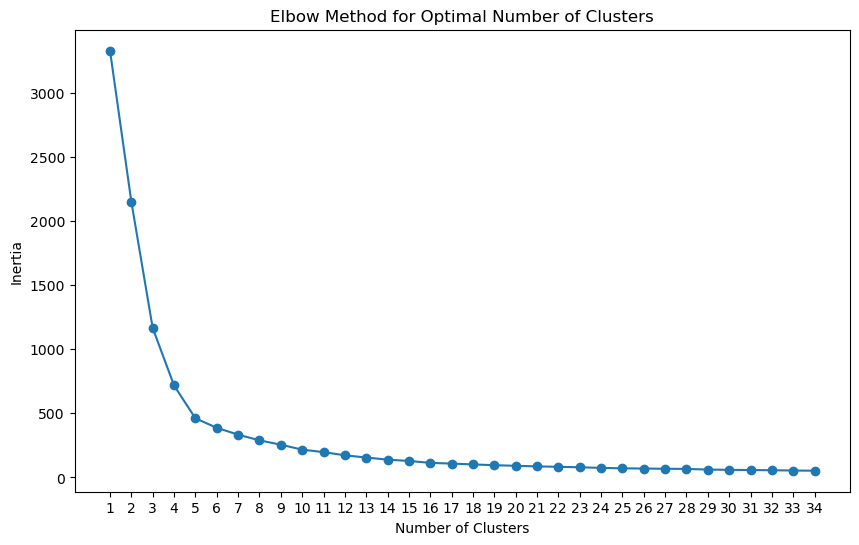

In [67]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the inertia values
inertia_values = []

# Try different numbers of clusters and calculate the inertia for each
for num_clusters in range(1, 35):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 35), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 35))

plt.savefig('charts/elbow.png')

plt.show()


# Kmeans

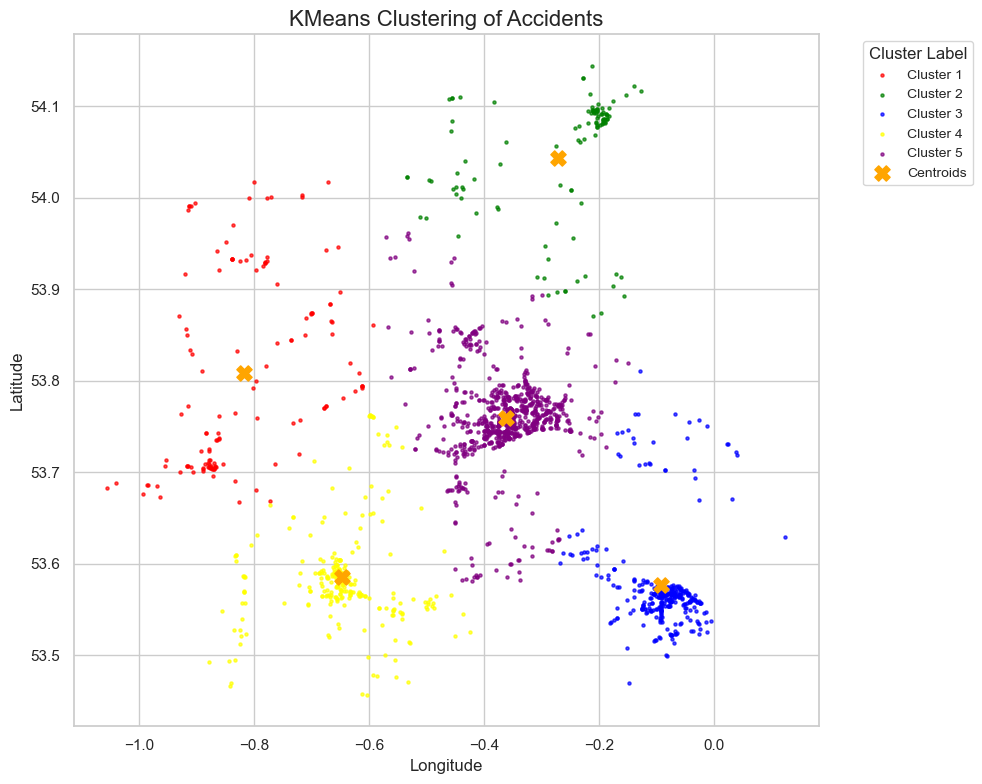

In [68]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=5
                , random_state=0, n_init=10)
labels = kmeans.fit_predict(selected_features)
centroids = kmeans.cluster_centers_

 

# Set the style for the plot (optional but improves aesthetics)
sns.set(style="whitegrid")

 

# Create the scatter plot to visualize the clusters and centroids
plt.figure(figsize=(10, 8))

 

# Define colors for the clusters
cluster_colors = ['red', 'green', 'blue', 'yellow', 'purple']

 

# Plot data points with different colors for each cluster
for i, color in enumerate(cluster_colors):
    cluster_data = selected_features[labels == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], s=5, color=color, alpha=0.7, label=f'Cluster {i+1}')

 

 #Plot centroids with orange X markers
plt.scatter(centroids[:, 0], centroids[:, 1], color='orange', marker='X', s=120, label='Centroids')

 

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('KMeans Clustering of Accidents', fontsize=16)
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.savefig('charts/K-Means.png')

plt.show()

### Visualizing the clustering on the Uk Map Highlighting the Humberside clusters

In [69]:
import folium

In [70]:
from sklearn.cluster import KMeans

# Fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
labels = kmeans.fit_predict(selected_features)
centroids = kmeans.cluster_centers_

# Create a folium map centered around the latitude and longitude of the data
map_clusters = folium.Map(location=[selected_features['latitude'].mean(), selected_features['longitude'].mean()], zoom_start=12)

# Define colors for the clusters
cluster_colors = ['red', 'green', 'blue', 'yellow', 'purple']

# Plot data points with different colors for each cluster
for i, color in enumerate(cluster_colors):
    cluster_data = selected_features[labels == i]
    for _, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.5,
            popup=f'Cluster {i+1}'
        ).add_to(map_clusters)

# Plot centroids with orange X markers
for centroid in centroids:
    folium.Marker(
        location=[centroid[1], centroid[0]],
        icon=folium.Icon(icon='exclamation', color='orange')
    ).add_to(map_clusters)

# Display the map
map_clusters


### DBSCAN Clustering

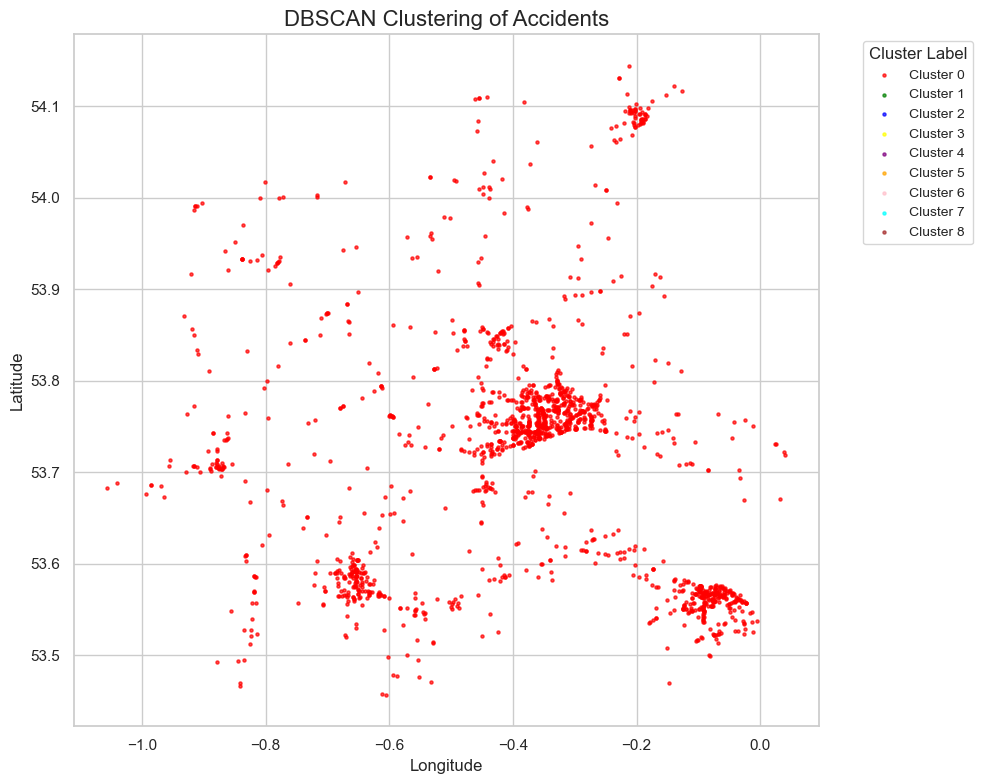

In [71]:
from sklearn.cluster import DBSCAN


# Create the DBSCAN model
dbscan = DBSCAN(eps=0.1, min_samples=10)  # You can adjust eps and min_samples as needed

# Fit the model to your selected features
labels = dbscan.fit_predict(selected_features)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Define colors for the clusters
cluster_colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'cyan', 'brown']

# Plot data points with different colors for each cluster
for i, color in enumerate(cluster_colors):
    cluster_data = selected_features[labels == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], s=5, color=color, alpha=0.7, label=f'Cluster {i}')

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('DBSCAN Clustering of Accidents', fontsize=16)
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.savefig('charts/DBSCAN.png')

plt.show()


### Agglomerative Clustering

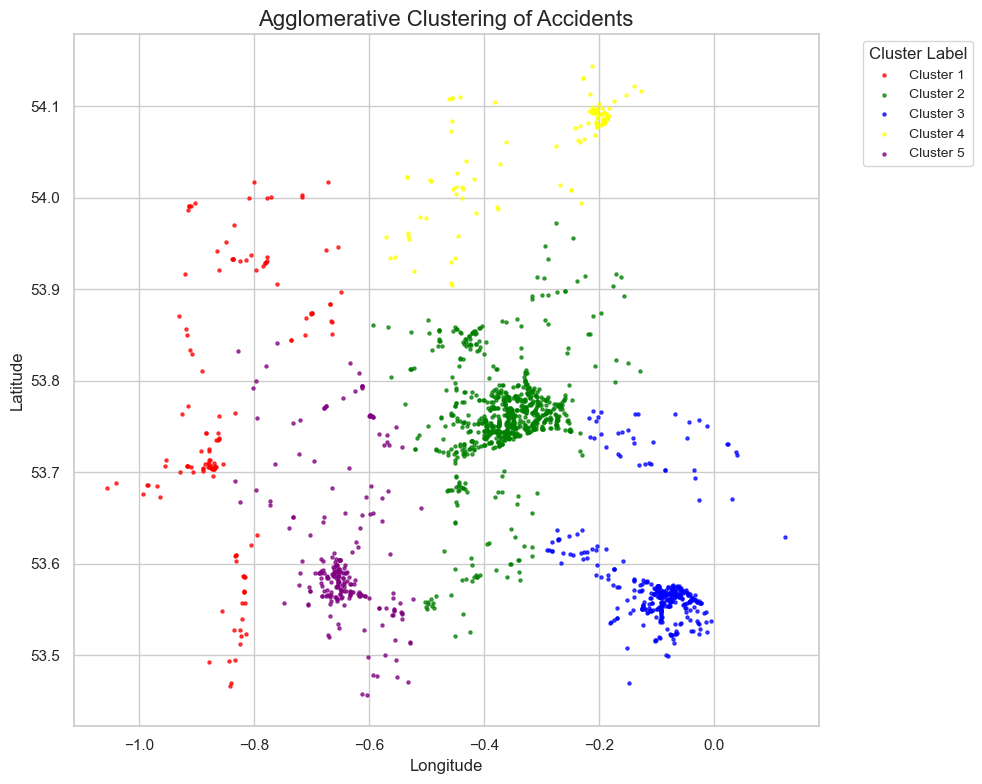

In [72]:
from sklearn.cluster import AgglomerativeClustering

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=5)
labels_agg = agg_cluster.fit_predict(selected_features)

# Set the style for the plot (optional but improves aesthetics)
sns.set(style="whitegrid")

# Create the scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Define colors for the clusters
cluster_colors = ['red', 'green', 'blue', 'yellow', 'purple']

# Plot data points with different colors for each cluster
for i, color in enumerate(cluster_colors):
    cluster_data = selected_features[labels_agg == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], s=5, color=color, alpha=0.7, label=f'Cluster {i+1}')

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Agglomerative Clustering of Accidents', fontsize=16)
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.savefig('charts/Agglomerative_Clustering.png')

plt.show()


# 6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

### At this point I have decided to merge my data. Exploring other variables from Casualty and Accident Tables 

In [73]:
# Identify most severe casualty for each accident
most_severe_casualty = df_casualty.groupby('accident_index')['casualty_severity'].idxmax()
most_severe_df_casualty = df_casualty.loc[most_severe_casualty]

# Merge accident data with most severe casualty data
merged_df = pd.merge(df_accident, most_severe_df_casualty, on='accident_index', how='left')

# Now, merge with vehicle data based on accident index
total_df = pd.merge(merged_df, df_vehicle, on='accident_index', how='left')

# Drop duplicates
total_df.drop_duplicates(subset='accident_index', keep='first', inplace=True)


In [74]:
total_df

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010228005             2020            010228005   
3       2020010228006             2020            010228006   
4       2020010228011             2020            010228011   
...               ...              ...                  ...   
167367  2020991027064             2020            991027064   
167369  2020991029573             2020            991029573   
167370  2020991030297             2020            991030297   
167372  2020991030900             2020            991030900   
167374  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    526432.0                182761.0  -0.178719  51.529614   
3                    538676.0                184371.0  -0.001683  51.541210   
4                    529324.0                181286.0  -0.137592  51.515704   
...                       ...                     ...        ...        ...   
167367               343034.0                731654.0  -2.926320  56.473539   
167369               257963.0                658891.0  -4.267565  55.802353   
167370               383664.0                810646.0  -2.271903  57.186317   
167372               277161.0                674852.0  -3.968753  55.950940   
167374               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  2                   1  ...   
4                  1                  3                   1  ...   
...              ...                ...                 ...  ...   
167367            99                  2                   2  ...   
167369            99                  3                   1  ...   
167370            99                  2                   2  ...   
167372            99                  3                   2  ...   
167374            99                  3                   1  ...   

        journey_purpose_of_driver sex_of_driver  age_of_driver  \
0                               6             2             32   
1                               2             1             45   
2                               6             3             -1   
3                               1             1             44   
4                               6             1             20   
...                           ...           ...            ...   
167367                          1             1             27   
167369                          3             2             39   
167370                          1             1             57   
167372                          6             2             68   
167374                          6             1             39   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
0                       6                1968               2              6   
1                       7                1395               1              2   
2                      -1                  -1              -1             -1   
3                       7                1798               8              8   
4                       4                2993               2              4   
...                   ...                 ...             ...            ...   
167367                  6                  -1              -1             -1   
167369                  7                1598      

In [75]:
total_df

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010228005             2020            010228005   
3       2020010228006             2020            010228006   
4       2020010228011             2020            010228011   
...               ...              ...                  ...   
167367  2020991027064             2020            991027064   
167369  2020991029573             2020            991029573   
167370  2020991030297             2020            991030297   
167372  2020991030900             2020            991030900   
167374  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    526432.0                182761.0  -0.178719  51.529614   
3                    538676.0                184371.0  -0.001683  51.541210   
4                    529324.0                181286.0  -0.137592  51.515704   
...                       ...                     ...        ...        ...   
167367               343034.0                731654.0  -2.926320  56.473539   
167369               257963.0                658891.0  -4.267565  55.802353   
167370               383664.0                810646.0  -2.271903  57.186317   
167372               277161.0                674852.0  -3.968753  55.950940   
167374               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  2                   1  ...   
4                  1                  3                   1  ...   
...              ...                ...                 ...  ...   
167367            99                  2                   2  ...   
167369            99                  3                   1  ...   
167370            99                  2                   2  ...   
167372            99                  3                   2  ...   
167374            99                  3                   1  ...   

        journey_purpose_of_driver sex_of_driver  age_of_driver  \
0                               6             2             32   
1                               2             1             45   
2                               6             3             -1   
3                               1             1             44   
4                               6             1             20   
...                           ...           ...            ...   
167367                          1             1             27   
167369                          3             2             39   
167370                          1             1             57   
167372                          6             2             68   
167374                          6             1             39   

       age_band_of_driver  engine_capacity_cc propulsion_code age_of_vehicle  \
0                       6                1968               2              6   
1                       7                1395               1              2   
2                      -1                  -1              -1             -1   
3                       7                1798               8              8   
4                       4                2993               2              4   
...                   ...                 ...             ...            ...   
167367                  6                  -1              -1             -1   
167369                  7                1598      

In [76]:
nan_counts = total_df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print(columns_with_nan)

location_easting_osgr     14
location_northing_osgr    14
longitude                 14
latitude                  14
dtype: int64


In [77]:
# drop nan values
total_df = total_df.dropna()


### Isolation forest

In [78]:
from sklearn.ensemble import IsolationForest

# Select the columns you want to use for outlier detection (numeric columns)
numeric_columns = total_df.select_dtypes(include=['float64', 'int64']).columns

# Create a new dataframe with only the selected numeric columns
numeric_df = total_df[numeric_columns]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=0)

# Fit the model and predict outliers
outliers_iso_forest = iso_forest.fit_predict(numeric_df)

# Add the outlier prediction column to the dataframe
total_df['outliers_iso_forest'] = outliers_iso_forest


In [79]:
outliers_iso_forest_counts = total_df['outliers_iso_forest'].value_counts()
print(outliers_iso_forest_counts)


 1    86625
-1     4560
Name: outliers_iso_forest, dtype: int64


Text(0, 0.5, 'Count')

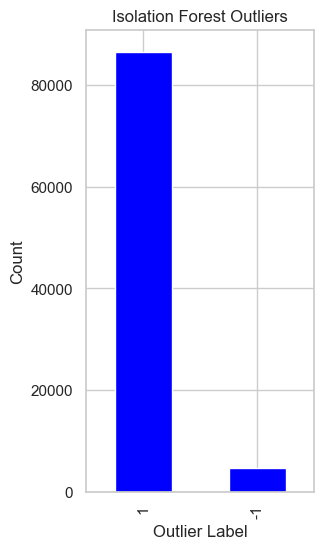

In [80]:
# Plot the counts of outliers for each method
plt.figure(figsize=(10, 6))

# Outliers detected by Isolation Forest
plt.subplot(1, 3, 1)
total_df['outliers_iso_forest'].value_counts().plot(kind='bar', color='blue')
plt.title('Isolation Forest Outliers')
plt.xlabel('Outlier Label')
plt.ylabel('Count')

### Local Outlier Factor

In [81]:
from sklearn.neighbors import LocalOutlierFactor

# Create LOF model
lof = LocalOutlierFactor(contamination=0.05)

# Fit the model and predict outliers
total_df['outliers_lof'] = lof.fit_predict(numeric_df)

# Count the number of outliers
outliers_lof_counts = total_df['outliers_lof'].value_counts()
print(outliers_lof_counts)


 1    86625
-1     4560
Name: outliers_lof, dtype: int64


Text(0, 0.5, 'Count')

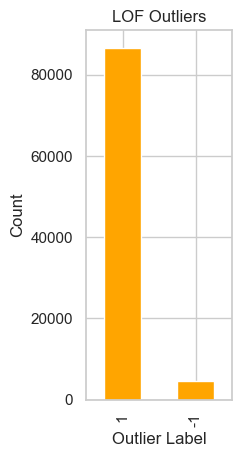

In [82]:
# Outliers detected by LOF
plt.subplot(1, 3, 3)
total_df['outliers_lof'].value_counts().plot(kind='bar', color='orange')
plt.title('LOF Outliers')
plt.xlabel('Outlier Label')
plt.ylabel('Count')

### DBscan

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the numeric columns
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_df)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
clusters_dbscan = dbscan.fit_predict(numeric_scaled)

# Add the cluster prediction column to the dataframe
total_df['clusters_dbscan'] = clusters_dbscan


In [84]:
clusters_dbscan_counts = total_df['clusters_dbscan'].value_counts()
print(clusters_dbscan_counts)

-1    91185
Name: clusters_dbscan, dtype: int64


Text(0, 0.5, 'Count')

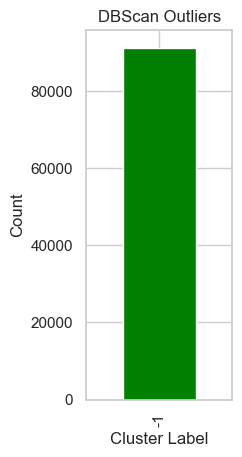

In [85]:
# Outliers detected by DBScan
plt.subplot(1, 3, 2)
total_df['clusters_dbscan'].value_counts().plot(kind='bar', color='green')
plt.title('DBScan Outliers')
plt.xlabel('Cluster Label')
plt.ylabel('Count')

In [86]:
total_df

accident_index  accident_year_x accident_reference_x  \
0       2020010219808             2020            010219808   
1       2020010220496             2020            010220496   
2       2020010228005             2020            010228005   
3       2020010228006             2020            010228006   
4       2020010228011             2020            010228011   
...               ...              ...                  ...   
167367  2020991027064             2020            991027064   
167369  2020991029573             2020            991029573   
167370  2020991030297             2020            991030297   
167372  2020991030900             2020            991030900   
167374  2020991032575             2020            991032575   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    526432.0                182761.0  -0.178719  51.529614   
3                    538676.0                184371.0  -0.001683  51.541210   
4                    529324.0                181286.0  -0.137592  51.515704   
...                       ...                     ...        ...        ...   
167367               343034.0                731654.0  -2.926320  56.473539   
167369               257963.0                658891.0  -4.267565  55.802353   
167370               383664.0                810646.0  -2.271903  57.186317   
167372               277161.0                674852.0  -3.968753  55.950940   
167374               240402.0                681950.0  -4.561040  56.003843   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  2                   1  ...   
4                  1                  3                   1  ...   
...              ...                ...                 ...  ...   
167367            99                  2                   2  ...   
167369            99                  3                   1  ...   
167370            99                  2                   2  ...   
167372            99                  3                   2  ...   
167374            99                  3                   1  ...   

        age_band_of_driver engine_capacity_cc  propulsion_code age_of_vehicle  \
0                        6               1968                2              6   
1                        7               1395                1              2   
2                       -1                 -1               -1             -1   
3                        7               1798                8              8   
4                        4               2993                2              4   
...                    ...                ...              ...            ...   
167367                   6                 -1               -1             -1   
167369                   7               1598                1              7   
167370                   9               1968                2              2   
167372                  10               1995                2              1   
167374                   7                999                1              2   

        generic_make_model driver_imd_decile driver_home_area_type  \
0                  AUDI Q5                 4                     1   
1                  AUDI A1                 7                     1   
2                       -1                -1                    -1   
3             TOYOTA PRIUS                 2                     1   
4             BMW 4 SERIES                -1                    -1   
...                    ...               ...                   ...   
167367               

### Isolation Forest

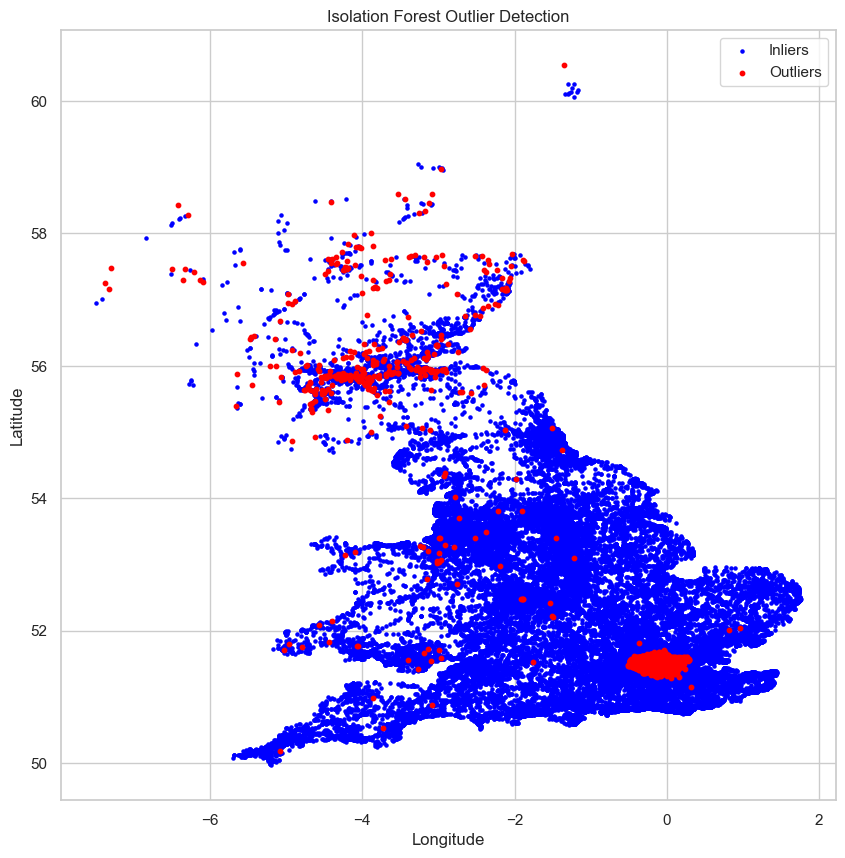

In [251]:
# Create a scatter plot
plt.figure(figsize=(10, 10))

# Plot inliers (outliers_iso_forest == 1) in blue
plt.scatter(total_df[total_df['outliers_iso_forest'] == 1]['longitude'], 
            total_df[total_df['outliers_iso_forest'] == 1]['latitude'], 
            c='blue', label='Inliers', s=5)

# Plot outliers (outliers_iso_forest == -1) in red
plt.scatter(total_df[total_df['outliers_iso_forest'] == -1]['longitude'], 
            total_df[total_df['outliers_iso_forest'] == -1]['latitude'], 
            c='red', label='Outliers', s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.savefig('charts/ISO.png')
plt.show()




### Local Outlier factor (LOF)

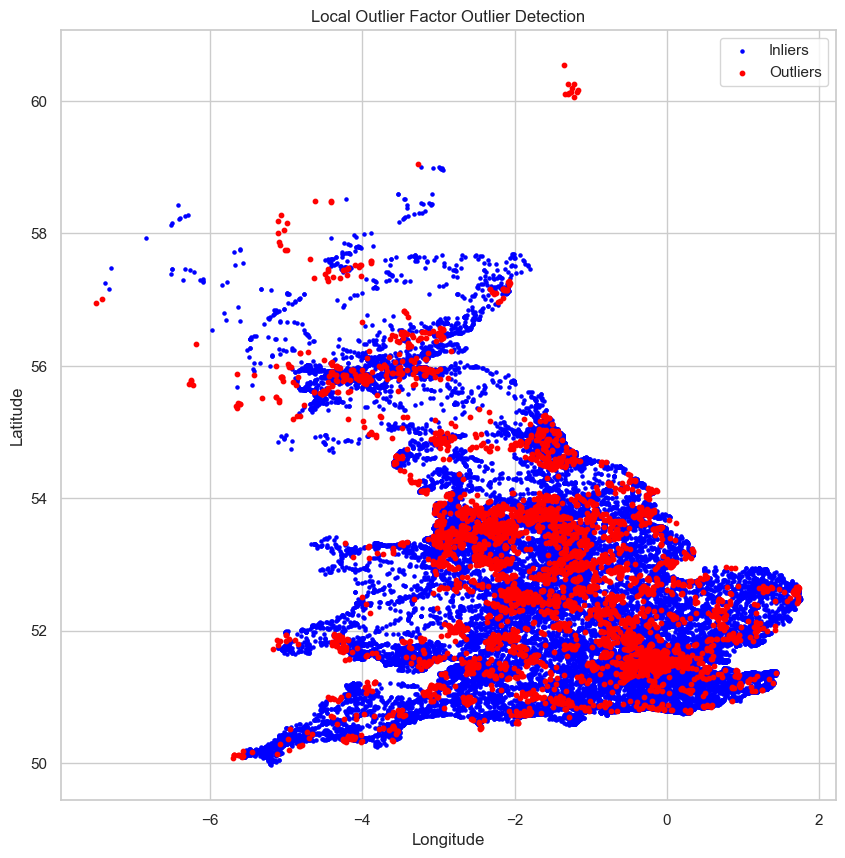

In [88]:
# Create a scatter plot
plt.figure(figsize=(10, 10))

# Plot inliers (outliers_lof == 1) in blue
plt.scatter(total_df[total_df['outliers_lof'] == 1]['longitude'], 
            total_df[total_df['outliers_lof'] == 1]['latitude'], 
            c='blue', label='Inliers', s=5)

# Plot outliers (outliers_lof == -1) in red
plt.scatter(total_df[total_df['outliers_lof'] == -1]['longitude'], 
            total_df[total_df['outliers_lof'] == -1]['latitude'], 
            c='red', label='Outliers', s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Local Outlier Factor Outlier Detection')
plt.legend()
plt.show()


### I have decided to keep the outliers and treat them, if any column needs cleaning before proceeding with my model. Discarding them will affect my classification model

### Further cleaning: Two columns in particular with outliers I want to clean

#### Juuction_control

<AxesSubplot: xlabel='junction_control', ylabel='Count'>

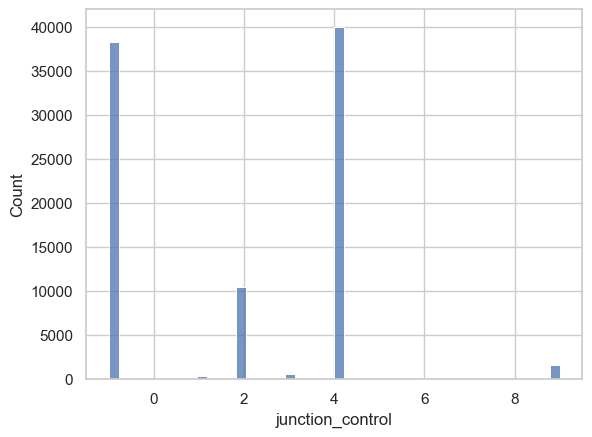

In [89]:
sns.histplot(total_df.junction_control)

In [90]:
total_df.junction_control.unique()

array([-1,  2,  1,  4,  9,  3], dtype=int64)

In [91]:
total_df.junction_control.value_counts()

 4    39993
-1    38292
 2    10405
 9     1536
 3      582
 1      377
Name: junction_control, dtype: int64

In [92]:
# Replacing the outlier values -1 and 9 with the mode 

# Calculate the mode of the junction_control column
junction_mode = total_df['junction_control'].mode()[0]

# Replace -1 and 9 with the calculated mode
total_df['junction_control'] = total_df['junction_control'].replace([-1, 9], junction_mode)



#### Second_road_class

<AxesSubplot: xlabel='second_road_class', ylabel='Count'>

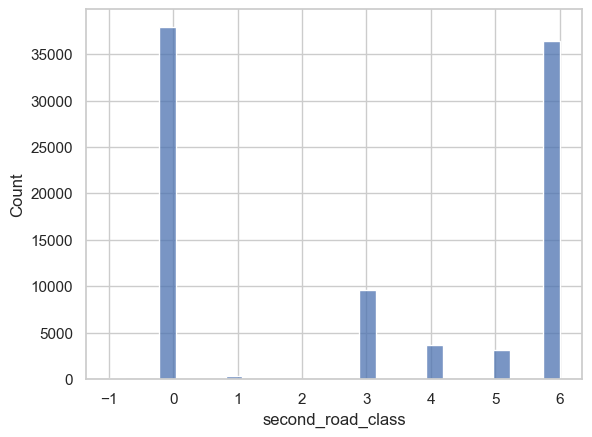

In [93]:

sns.histplot(total_df.second_road_class)

In [94]:
total_df.second_road_class.unique()

array([ 0,  6,  5,  3,  4,  1, -1,  2], dtype=int64)

In [95]:
total_df.second_road_class.value_counts()

 0    37922
 6    36430
 3     9563
 4     3656
 5     3154
 1      314
-1      110
 2       36
Name: second_road_class, dtype: int64

### In maintaing consistency, I will replace -1 and 0 with 6(unclassified) as it seems most appropriate. The second_road_class instruction chapter1.18 suggests that where class is not appropriately distinguished by a authorities, unclassified 6 should be assigned

In [96]:
# Replace -1 and 0 with 6 in the second_road_class column
total_df['second_road_class'] = total_df['second_road_class'].replace([-1, 0], 6)


<AxesSubplot: xlabel='second_road_class', ylabel='Count'>

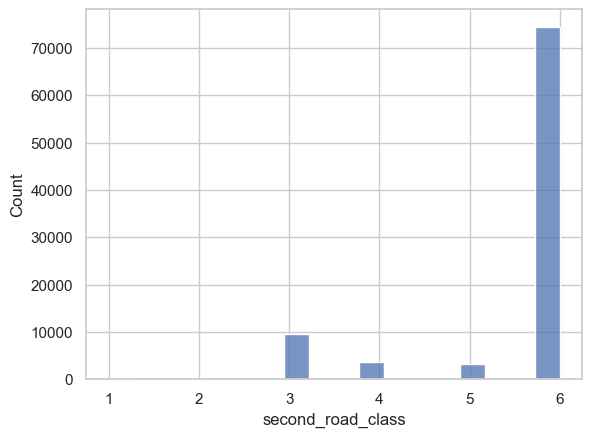

In [97]:

sns.histplot(total_df.second_road_class)

## 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

### First I am going to run a feature selection again. Only this time it is on a combined table

### Balancing my Dataset Using UnderSampling 

In [98]:
# Creating a label for severe accidents (accident_severity = 1)
y_label = total_df['accident_severity'] == 1

In [99]:
mappings = {1: True, 2: False, 3: False}
y_label = total_df.accident_severity.map(mappings)
y_label

0         False
1         False
2         False
3         False
4         False
          ...  
167367    False
167369    False
167370    False
167372    False
167374    False
Name: accident_severity, Length: 91185, dtype: bool

### Mapping to classify aciddents into Fatal and Non fatal

In [100]:
y_label.value_counts()

False    89794
True      1391
Name: accident_severity, dtype: int64

In [101]:
from imblearn.under_sampling import RandomUnderSampler
total_drop=total_df
# Balancing the dataset using RandomUnderSampler
total_balanced, y_bal = RandomUnderSampler().fit_resample(total_drop, y_label)

# Dropping the 'accident_severity', "did_police_officer_attend_scene_of_accident" and "casualty_severity" columns from the balanced dataset 
total_balanced.drop(columns= ['accident_severity', 'did_police_officer_attend_scene_of_accident', 'casualty_severity'], inplace=True)

In [102]:
total_balanced

accident_index  accident_year_x accident_reference_x  \
0     2020360960387             2020            360960387   
1     2020552000352             2020            552000352   
2     2020100955602             2020            100955602   
3     2020990945647             2020            990945647   
4     2020410977061             2020            410977061   
...             ...              ...                  ...   
2777  2020991006874             2020            991006874   
2778  2020991009077             2020            991009077   
2779  2020991010035             2020            991010035   
2780  2020991010115             2020            991010115   
2781  2020991010320             2020            991010320   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                  652437.0                304472.0   1.724585  52.579435   
1                  405276.0                 91129.0  -1.926618  50.719753   
2                  439567.0                557198.0  -1.384430  54.907945   
3                  251452.0                667038.0  -4.375799  55.873531   
4                  548736.0                220860.0   0.158825  51.866504   
...                     ...                     ...        ...        ...   
2777               254367.0                661245.0  -4.326142  55.822415   
2778               270790.0                659812.0  -4.063523  55.814225   
2779               113410.0                903322.0  -6.842655  57.926736   
2780               381609.0                654146.0  -2.294786  55.780278   
2781               381719.0                665575.0  -2.293805  55.882969   

      police_force  number_of_vehicles  number_of_casualties  ...  \
0               36                   4                     2  ...   
1               55                   2                     4  ...   
2               10                   2                     3  ...   
3               99                   2                     2  ...   
4               41                   2                     1  ...   
...            ...                 ...                   ...  ...   
2777            99                   1                     1  ...   
2778            99                   2                     1  ...   
2779            99                   1                     1  ...   
2780            99                   2                     1  ...   
2781            99                   2                     1  ...   

     age_band_of_driver  engine_capacity_cc propulsion_code  age_of_vehicle  \
0                     7                 535               1              26   
1                     6                1498               1               1   
2                     4                1197               1               4   
3                     6                 998               1               8   
4                     5                  -1              -1              -1   
...                 ...                 ...             ...             ...   
2777                  6                1994               1              16   
2778                  8                1995               2               7   
2779                  6                1461               2               1   
2780                  8                1499               2               4   
2781                  6                1149               1              15   

        generic_make_model driver_imd_decile  driver_home_area_type  \
0     YAMAHA MODEL MISSING                 6                      1   
1          VOLKSWAGEN GOLF                 2                      1   
2          VOLKSWAGEN POLO                 3                      1   
3              KIA PICANTO                -1                     -1   
4                       -1                 4                      1   
...                    ...               ...                    ...   
2777        SUBARU IMPREZA                 2                      1   
2

In [103]:
y_bal.value_counts()

False    1391
True     1391
Name: accident_severity, dtype: int64

In [104]:
# Selecting only numeric features in the balanced dataset
total_balanced = total_balanced.select_dtypes([np.number])

In [105]:
total_balanced.isna().sum()

accident_year_x           0
location_easting_osgr     0
location_northing_osgr    0
longitude                 0
latitude                  0
                         ..
driver_imd_decile         0
driver_home_area_type     0
outliers_iso_forest       0
outliers_lof              0
clusters_dbscan           0
Length: 72, dtype: int64

### Feature Selection

In [106]:
from sklearn.feature_selection import SelectKBest, f_classif

In [107]:
# # Initialize feature selector and select the top 15 features
selector = SelectKBest(f_classif, k = 15)

In [108]:
selector.fit(total_balanced, y_bal)

SelectKBest(k=15)

In [109]:
# Boolean mask
bool_mask = selector.get_support()

In [110]:
# Get the names of features
names = selector.feature_names_in_[bool_mask]

In [111]:
# Get the scores of features
scores = selector.scores_[bool_mask]

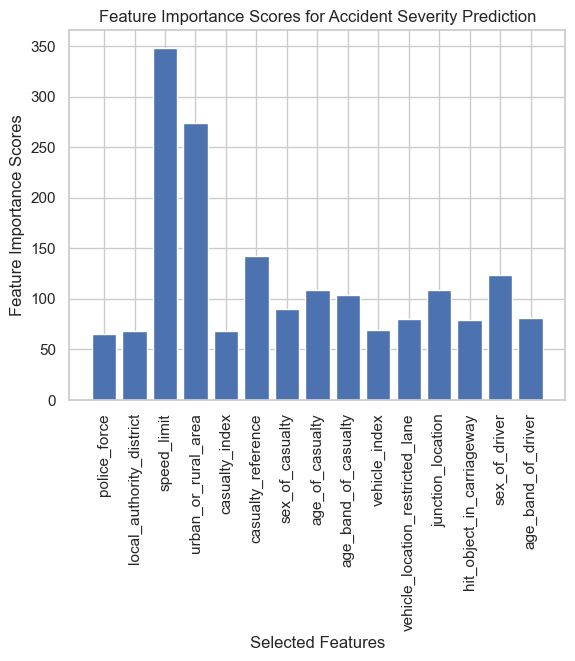

In [112]:
# Visualize the scores of selected features
plt.bar(names, scores)
plt.xticks(rotation='vertical')
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance Scores')
plt.title('Feature Importance Scores for Accident Severity Prediction')
plt.show()

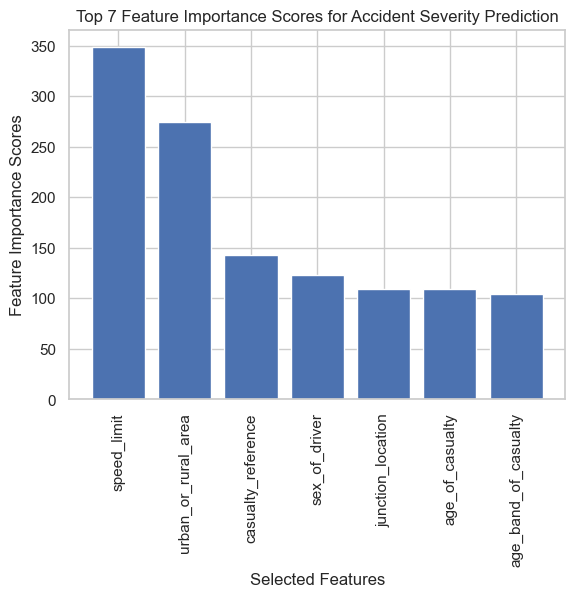

In [113]:
# Sort feature scores in descending order
sorted_indices = scores.argsort()[::-1]
sorted_names = names[sorted_indices]
sorted_scores = scores[sorted_indices]

# Plot the top 7 selected features
plt.bar(sorted_names[:7], sorted_scores[:7])
plt.xticks(rotation='vertical')
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance Scores')
plt.title('Top 7 Feature Importance Scores for Accident Severity Prediction')
plt.show()


### For the features that I still need to clean potential 4 from the new top 7 columns that I have not cleaned before I develop my model (casualty_reference, sex_of_driver, age of casualty, age_band_of_casualty)

#### sex of driver

In [114]:
total_balanced.sex_of_driver.unique()

array([1, 2, 3], dtype=int64)

In [115]:
driver_sex_counts = total_balanced['sex_of_driver'].value_counts()
print(driver_sex_counts)


1    2034
2     617
3     131
Name: sex_of_driver, dtype: int64


In [116]:
#dropping the 2 values of -1 permanenetly as there are easily negligible
total_balanced = total_balanced[total_balanced['sex_of_driver'] != -1]



<AxesSubplot: xlabel='sex_of_driver', ylabel='Count'>

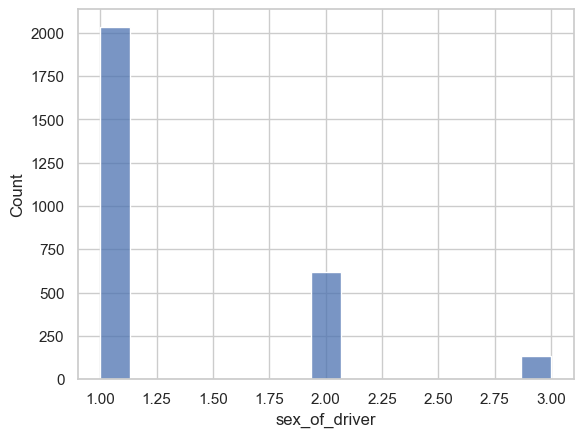

In [117]:
sns.histplot(total_balanced.sex_of_driver)

### Age band of casualty

In [118]:
total_balanced.age_band_of_casualty.unique()

array([ 7,  6,  4,  5,  3,  8, 11, 10,  9,  1,  2, -1], dtype=int64)

In [119]:
age_counts = total_balanced['age_band_of_casualty'].value_counts()
print(age_counts)

 6     605
 7     417
 8     387
 9     315
 5     272
 4     220
 11    209
 10    198
 3      73
 2      34
 1      32
-1      20
Name: age_band_of_casualty, dtype: int64


<AxesSubplot: xlabel='age_band_of_casualty', ylabel='Count'>

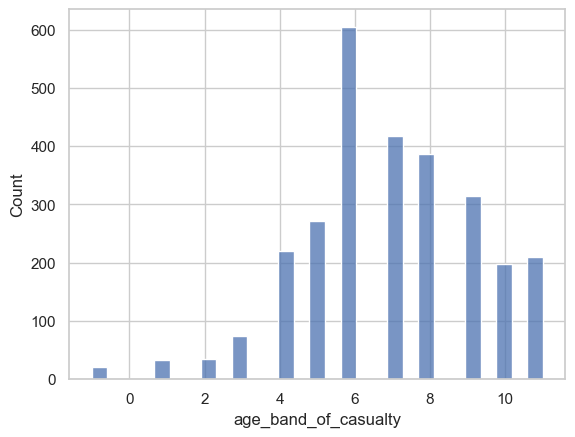

In [120]:
sns.histplot(total_balanced.age_band_of_casualty)

In [121]:
#Check median
total_balanced.age_band_of_casualty.median()

7.0

In [122]:
#Assign Median to -1
total_df['age_band_of_casualty'].replace(-1, 7.0, inplace=True)


In [123]:
total_balanced.junction_control.unique()

array([4, 2, 3, 1], dtype=int64)

### This Point, I will proceed to try new features having run a corr. Matrix. The aim is to get the best features to make better predictions 

## I have intentionally left out "did_police_officer_attend_scene_of_accident" and "casualty_severity" as we are trying to predict an outcome not factors that occured after the accident

In [124]:
correlation_matrix = total_df.corr()
target_correlation = correlation_matrix['accident_severity'].sort_values(ascending=False)
target_correlation.head(15)


accident_severity                              1.000000
casualty_severity                              0.884669
did_police_officer_attend_scene_of_accident    0.153503
vehicle_location_restricted_lane               0.105953
hit_object_in_carriageway                      0.105649
hit_object_off_carriageway                     0.102842
vehicle_left_hand_drive                        0.088988
vehicle_manoeuvre                              0.086737
trunk_road_flag                                0.078055
number_of_vehicles                             0.076482
skidding_and_overturning                       0.075319
sex_of_casualty                                0.075000
sex_of_driver                                  0.073839
junction_location                              0.073657
pedestrian_crossing_human_control              0.070295
Name: accident_severity, dtype: float64

### Cleaning 

### vehicle_location_restricted_lane

In [125]:
total_balanced['vehicle_location_restricted_lane'].unique()

array([ 0, 99,  6,  9,  4, -1,  2,  1,  5,  3,  7], dtype=int64)

In [126]:
lane_counts = total_balanced['vehicle_location_restricted_lane'].value_counts()
print(lane_counts)

 0     2599
 99      82
 9       52
 2       11
 6       10
 4        9
-1        6
 1        4
 5        4
 7        4
 3        1
Name: vehicle_location_restricted_lane, dtype: int64


In [127]:
# # Replace 99 with 9 and -1 with 9
total_balanced['vehicle_location_restricted_lane'].replace({99: 9, -1: 9}, inplace=True)

### hit_object_in_carriageway

In [128]:
hit_object_in_counts = total_balanced['hit_object_in_carriageway'].value_counts()
print(hit_object_in_counts)

 0     2451
 10      85
 99      84
 4       71
 7       31
 11      20
 9       11
 6       11
 12       6
-1        5
 8        3
 1        2
 2        2
Name: hit_object_in_carriageway, dtype: int64


In [129]:
# # Replace 99 and -1 with the mode
mode_hit_object_in = total_balanced['hit_object_in_carriageway'].mode()[0]
total_balanced['hit_object_in_carriageway'].replace({99: mode_hit_object_in, -1: mode_hit_object_in}, inplace=True)


### Vehicle Left hand Drive

In [130]:
left_hand_drive_counts = total_balanced['vehicle_left_hand_drive'].value_counts()
print(left_hand_drive_counts)

 1    2710
 9      50
 2      17
-1       5
Name: vehicle_left_hand_drive, dtype: int64


In [131]:
# # Replace 9 and -1 with the mode
mode_left_hand_drive = total_balanced['vehicle_left_hand_drive'].mode()[0]
total_balanced['vehicle_left_hand_drive'].replace({9: mode_left_hand_drive, -1: mode_left_hand_drive}, inplace=True)

### Vehicle Manoveur

In [132]:
manoveur_counts = total_balanced['vehicle_manoeuvre'].value_counts()
print(manoveur_counts)

 18    1460
 9      280
 16     194
 17     160
 7       97
 5       95
 4       90
 13      88
 99      87
 1       40
 3       36
 2       30
 15      26
 6       25
 11      23
 12      20
 14      12
 10      10
-1        5
 8        4
Name: vehicle_manoeuvre, dtype: int64


In [133]:
# Replace -1 and 99 with mode
mode_manoevre = total_balanced['vehicle_manoeuvre'].mode()[0]
total_balanced['vehicle_manoeuvre'].replace({99: mode_manoevre, -1: mode_manoevre}, inplace=True)

### Building Model

### Random Forest Classifier

In [225]:
features = total_balanced[['vehicle_location_restricted_lane', 'hit_object_in_carriageway',
                      'vehicle_left_hand_drive', 'vehicle_manoeuvre',
                      "speed_limit", 'junction_control', "vehicle_type", "vehicle_leaving_carriageway","first_point_of_impact"]]
target = y_bal

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

### Tuning Block

In [227]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

### Initialize GridSearchCV

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [228]:
# Perform hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the tuning
best_rf_classifier = grid_search.best_estimator_


In [229]:
# Train the best model
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

In [230]:
# Predict on the test data
y_pred_best = best_rf_classifier.predict(X_test)

### Evaluate the best model

In [231]:
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

       False       0.73      0.70      0.71       292
        True       0.68      0.72      0.70       265

    accuracy                           0.71       557
   macro avg       0.71      0.71      0.71       557
weighted avg       0.71      0.71      0.71       557



### Gradient Boosting Classifier

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for hyperparameter tuning
param_grid_gb = {
    'n_estimators': [100, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}


gb_classifier = GradientBoostingClassifier(random_state=0)

grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=5, scoring='f1', n_jobs=-1)


In [233]:
# Perform hyperparameter tuning on the training set
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 400]},
             scoring='f1')

In [234]:
# Get the best hyperparameters from the tuning
best_gb_classifier = grid_search_gb.best_estimator_

In [235]:
# Train the best model
best_gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=0)

In [236]:
# Predict on the test data
y_pred_best_gb = best_gb_classifier.predict(X_test)

### Evaluate the best model

In [237]:
print(classification_report(y_test, y_pred_best_gb))

              precision    recall  f1-score   support

       False       0.73      0.67      0.70       292
        True       0.67      0.73      0.70       265

    accuracy                           0.70       557
   macro avg       0.70      0.70      0.70       557
weighted avg       0.70      0.70      0.70       557



### Feature Importance: telling us The highest factors leading to fatal accidents_RF Classifier

In [238]:
feature_importance = best_rf_classifier.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                            Feature  Importance
4                       speed_limit    0.275449
3                 vehicle_manoeuvre    0.199410
7       vehicle_leaving_carriageway    0.163275
6                      vehicle_type    0.139919
8             first_point_of_impact    0.099308
1         hit_object_in_carriageway    0.050041
0  vehicle_location_restricted_lane    0.038760
5                  junction_control    0.024487
2           vehicle_left_hand_drive    0.009351


### Visualize feature importance

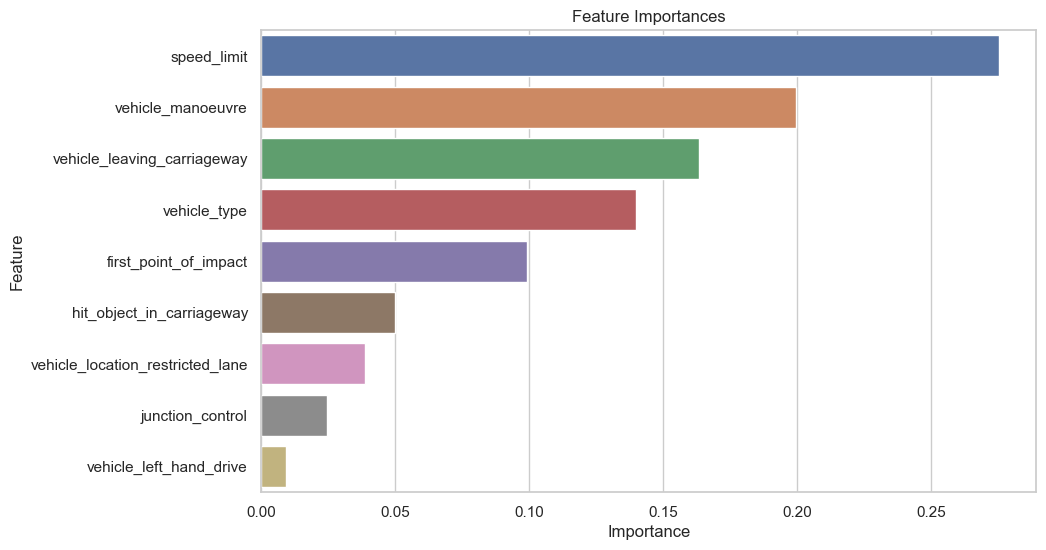

In [239]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('charts/Important_features.png')
plt.show()


### Feature Importance: telling us The highest factors leading to fatal accidents_GB Classifier

In [240]:
feature_importance_gb = best_gb_classifier.feature_importances_
feature_names = features.columns
importance_df_gb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_gb})
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)
print(importance_df)

                            Feature  Importance
4                       speed_limit    0.275449
3                 vehicle_manoeuvre    0.199410
7       vehicle_leaving_carriageway    0.163275
6                      vehicle_type    0.139919
8             first_point_of_impact    0.099308
1         hit_object_in_carriageway    0.050041
0  vehicle_location_restricted_lane    0.038760
5                  junction_control    0.024487
2           vehicle_left_hand_drive    0.009351


### Visualize feature importance

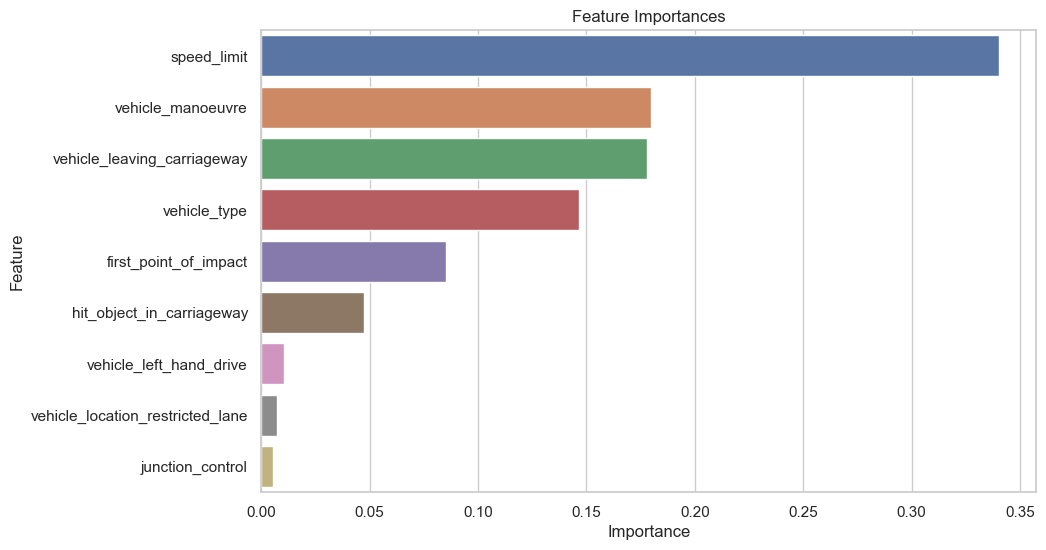

In [241]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('charts/Important_features_gb.png')
plt.show()


### Confusion Matrix

In [247]:
from sklearn.metrics import confusion_matrix

In [248]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

In [249]:
conf_matrix

array([[203,  89],
       [ 74, 191]], dtype=int64)

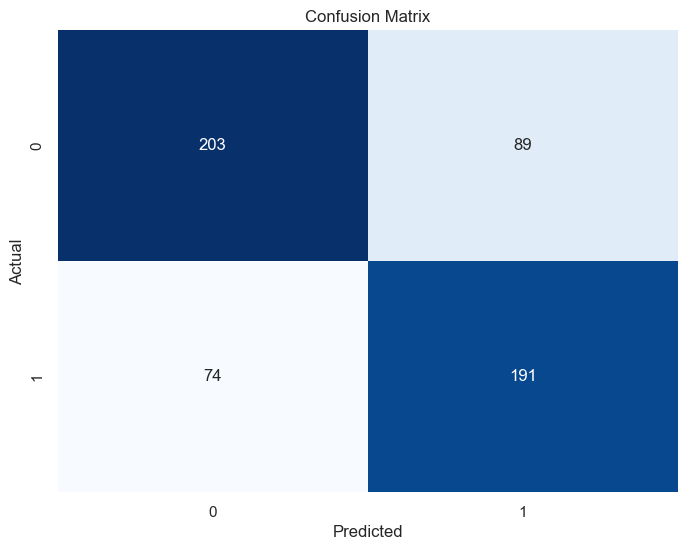

In [250]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Confusion Matrix GB_Classifier

In [243]:
conf_matrix = confusion_matrix(y_test, y_pred_best_gb)

In [244]:
conf_matrix

array([[196,  96],
       [ 71, 194]], dtype=int64)

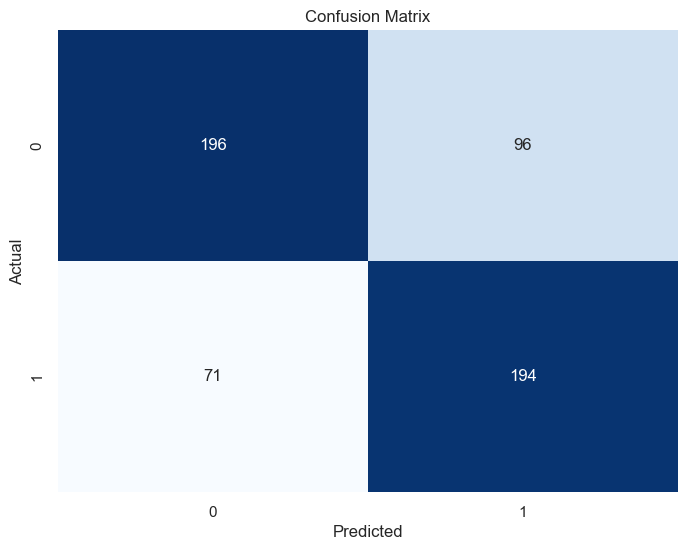

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
